In [2853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import mapclassify as mcl
from matplotlib.colors import Normalize
import geopandas as gdp
from statsmodels.tsa.arima.model import ARIMA

#from statsmodels.tsa.arima_model import ARIMA
#statsmodels.tsa.arima.model.ARIMA
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2854]:
crimes_df = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [2855]:
crimes_main_df = crimes_df.copy()

In [2856]:
crimes_df["TOTAL_THEFT"] = crimes_df["THEFT"] + crimes_df["OTHER THEFT"] + crimes_df["AUTO THEFT"]

In [2857]:
crimes_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'TOTAL_THEFT'],
      dtype='object')

In [2858]:
fp = "india_st.shp"
map_India = gdp.read_file(fp)

In [2859]:
#map_India['STATE'] = map_India['STATE'].replace(['Andaman & Nicobar Island', "Andhra Pradesh", 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 'NCT of Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
#       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], 
#                                                ["A & N ISLANDS", "ANDHRA PRADESH", 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
#       'MEGHALAYA', 'MIZORAM', 'NAGALAND','ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',  'WEST BENGAL'])
#  

In [2860]:
map_India['STATE'] = map_India['STATE'].replace(['ANDAMAN AND NICOBAR ISLANDS', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU' , 'DELHI' , 'JAMMU AND KASHMIR', 'ORISSA', 'PONDICHERRY'], 
                                                ["A & N ISLANDS" , 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'JAMMU & KASHMIR', 'ODISHA', 'PUDUCHERRY'])
  

In [2861]:
crimes_df.head(5)

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0          50                      46  ...                1131            16   
1          23                      53  ...                1543             7   
2          27                      59  ...                2088            14   
3          20                      25  ...                 795            17   
4          23                      49  ...                1244            12   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   
4                                            0                          431   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  TOTAL_THEFT  
0              1518              4154          398  
1               754              4125          732  
2              1262              5818         1446  
3              1181              3140          346  
4              2313              6507         2042  

[5 rows x 34 columns]

In [2862]:
crimes_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'TOTAL_THEFT'],
      dtype='object')

In [2863]:
crimes_df = crimes_df.rename(columns={'STATE/UT': 'STATE'})

In [2864]:
crimes_df = crimes_df.rename(columns={'TOTAL IPC CRIMES': 'TOTAL'})

In [2865]:
crimes_df['STATE'] = crimes_df['STATE'].replace(['A&N Islands', "Andhra Pradesh", 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], 
                                                ["A & N ISLANDS", "ANDHRA PRADESH", 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
       'MEGHALAYA', 'MIZORAM', 'NAGALAND','ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',  'WEST BENGAL'])
 

In [2866]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["ZZ TOTAL"], ["TOTAL"])

In [2867]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["SOUTH-EAST", "SOUTH-WEST", "NORTH-EAST", "NORTH-WEST",
                                                     "IGI AIRPORT", "GRP(RLY)", "STF", 'DELHI UT TOTAL'], ["SOUTH EAST", "SOUTH WEST", "NORTH EAST", "NORTH WEST",
                                                     "I.G.I. AIRPORT", "G.R.P.(RLY)", "S.T.F.", 'TOTAL'])

In [2868]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["HOWRAH CITY"], ["HOWRAH"])

In [2869]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["HOWRAH G.R.P."], ["HOWRAH"])

In [2870]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(['G.R.P. AJMER', 'G.R.P. JODHPUR'],['G.R.P.AJMER', 'G.R.P.JODHPUR'])

In [2871]:
crimes_df.rename(columns={'HURT/GREVIOUS HURT': 'HURT', 'KIDNAPPING & ABDUCTION': 'KIDNAPPING', 'CAUSING DEATH BY NEGLIGENCE':'DEATH_BY_NEGLIGENCE', 
                          'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY':'ASSAULT_WOMEN_MODESTY','CRUELTY BY HUSBAND OR HIS RELATIVES': 'CRUELTY_BY_HUSBAND', 
                         'CRIMINAL BREACH OF TRUST':'CRIMINAL_BREACH_OF_TRUST'}, inplace=True)

In [2872]:
crimes_df['STATE'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [2873]:
crimes_df.shape

(9017, 34)

In [2874]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   STATE                                        9017 non-null   object
 1   DISTRICT                                     9017 non-null   object
 2   YEAR                                         9017 non-null   int64 
 3   MURDER                                       9017 non-null   int64 
 4   ATTEMPT TO MURDER                            9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    9017 non-null   int64 
 6   RAPE                                         9017 non-null   int64 
 7   CUSTODIAL RAPE                               9017 non-null   int64 
 8   OTHER RAPE                                   9017 non-null   int64 
 9   KIDNAPPING                                   9017 non-null   int64 
 10  KIDNAPPING A

In [2875]:
crimes_state = crimes_df.groupby("STATE").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum ,'OTHER IPC CRIMES':sum, 'TOTAL':sum}).reset_index()
       

In [2876]:
merged_Ind = map_India.set_index('STATE').join(crimes_state.set_index('STATE'))
merged_Ind.head()

geometry  \
STATE                                                                  
A & N ISLANDS      MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...   
ANDHRA PRADESH     POLYGON ((82.00063 17.95354, 82.11718 18.02457...   
ARUNACHAL PRADESH  POLYGON ((95.61476 27.34745, 95.69234 27.33888...   
ASSAM              POLYGON ((92.82207 25.57781, 92.69672 25.61368...   
BIHAR              POLYGON ((84.16946 26.28322, 83.91399 26.38523...   

                   TOTAL_THEFT     HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
STATE                                                                     
A & N ISLANDS             4496     2210         188                 242   
ANDHRA PRADESH         1148760  1093130       42478              238014   
ARUNACHAL PRADESH        20712    10314        1714                 334   
ASSAM                   341900   138366       55878               78776   
BIHAR                   613488   378532       74440               51360   

                   BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING   RIOTS  \
STATE                                                                        
A & N ISLANDS          1784     320                   84       506     280   
ANDHRA PRADESH       194672   63512               276870    197686   54918   
ARUNACHAL PRADESH      5560    1682                 1490      1040     680   
ASSAM                 69504   30864                60410     24782   69926   
BIHAR                 80586   82490                88884     61380  210192   

                   ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES    TOTAL  
STATE                                                                
A & N ISLANDS                        428              8886    18204  
ANDHRA PRADESH                    103998            964504  4037962  
ARUNACHAL PRADESH                   1568             14792    55304  
ASSAM                              27240            362708  1195528  
BIHAR                              15152           1077182  2692586

In [2877]:
merged_Ind.isna().sum()

geometry                 0
TOTAL_THEFT              0
HURT                     0
KIDNAPPING               0
CRUELTY_BY_HUSBAND       0
BURGLARY                 0
MURDER                   0
DEATH_BY_NEGLIGENCE      0
CHEATING                 0
RIOTS                    0
ASSAULT_WOMEN_MODESTY    0
OTHER IPC CRIMES         0
TOTAL                    0
dtype: int64

In [2878]:
crimes_distribution = crimes_df[crimes_df.DISTRICT=='TOTAL']


In [2879]:
crimes_distribution = crimes_distribution.groupby(["YEAR"]).agg({'MURDER':sum, 'ATTEMPT TO MURDER':sum,
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER':sum, 'RAPE':sum, 'CUSTODIAL RAPE':sum,
       'OTHER RAPE':sum, 'KIDNAPPING':sum,
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS':sum,
       'KIDNAPPING AND ABDUCTION OF OTHERS':sum, 'DACOITY':sum,
       'PREPARATION AND ASSEMBLY FOR DACOITY':sum, 'ROBBERY':sum, 'BURGLARY':sum,
        'RIOTS':sum, 'CRIMINAL_BREACH_OF_TRUST':sum,
       'CHEATING':sum, 'COUNTERFIETING':sum, 'ARSON':sum, 'HURT':sum,
       'DOWRY DEATHS':sum, 'ASSAULT_WOMEN_MODESTY':sum,
       'INSULT TO MODESTY OF WOMEN':sum, 'CRUELTY_BY_HUSBAND':sum,
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES':sum,
       'DEATH_BY_NEGLIGENCE':sum, 'OTHER IPC CRIMES':sum, "TOTAL_THEFT":sum}).reset_index()
       

In [2880]:
crimes_distribution = crimes_distribution.append(crimes_distribution.sum().rename('total'))
crimes_distribution['YEAR'].replace(26091, 'Total', inplace=True)
crimes_distribution = crimes_distribution[crimes_distribution['YEAR'] == 'Total']
crimes_sum = crimes_distribution.T.reset_index()


In [2881]:

labels = ['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY',
       'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', "THEFTTOTAL"]

values = [435744, 387394, 47994, 272844, 422318, 63948, 35100, 280194, 1221740,847053,
         203648, 874927, 29067, 123061, 3706545, 99285, 523894, 136643, 994067, 923, 1113381, 6310244]
fig = go.Figure(data=[go.Pie(labels=labels, values=values ,textinfo='label+percent',
                              )])
fig.update_layout(
    uniformtext_minsize= 20,
    title_text="Distribution of Crimes",
    paper_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=1150,
    height=800)
fig.show()

In [2882]:

labels = ['MURDER', 'KIDNAPPING & ABDUCTION', 'BURGLARY',
        'RIOTS',
        'CHEATING', 'HURT/GREVIOUS HURT',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
        'CRUELTY BY HUSBAND OR HIS RELATIVES',
        'CAUSING DEATH BY NEGLIGENCE', "THEFTTOTAL"]

values = [435744, 422318, 1221740,847053,
          874927, 3706545, 523894, 994067, 1113381, 6310244]
fig = go.Figure(data=[go.Pie(labels=labels, values=values ,textinfo='label+percent',
                              )])
fig.update_layout(
    uniformtext_minsize= 20,
    title_text="Top 10 Crimes in India",
    paper_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=1000,
    height=900)
fig.show()

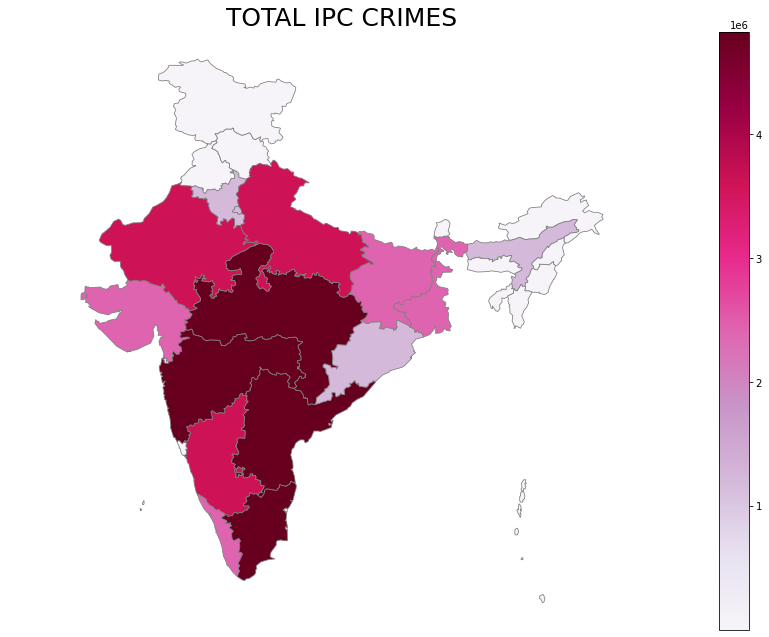

In [2883]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('TOTAL IPC CRIMES', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='TOTAL', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['TOTAL'].min(), vmax= merged_Ind["TOTAL"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

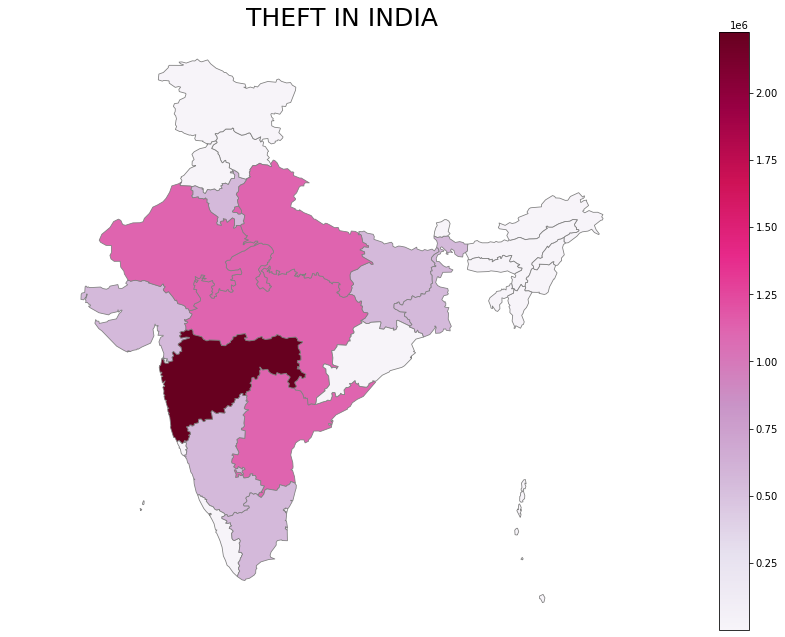

In [2884]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('THEFT IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='TOTAL_THEFT', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['TOTAL_THEFT'].min(), vmax= merged_Ind["TOTAL_THEFT"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

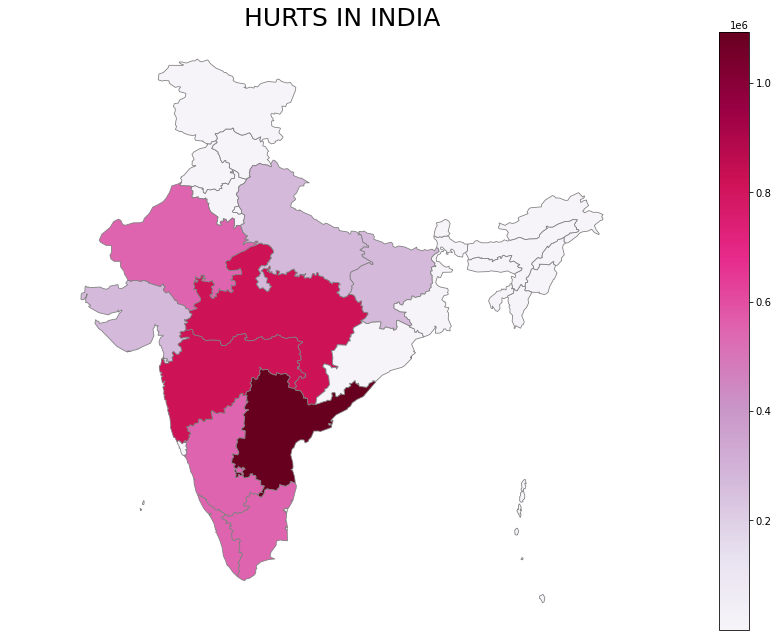

In [2885]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('HURTS IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='HURT', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['HURT'].min(), vmax= merged_Ind["HURT"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

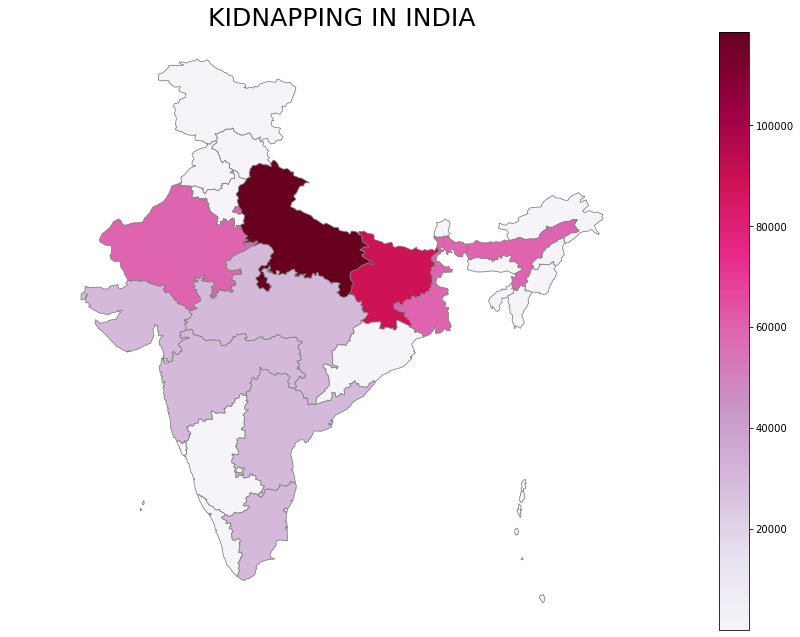

In [2886]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('KIDNAPPING IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='KIDNAPPING', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['KIDNAPPING'].min(), vmax= merged_Ind["KIDNAPPING"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

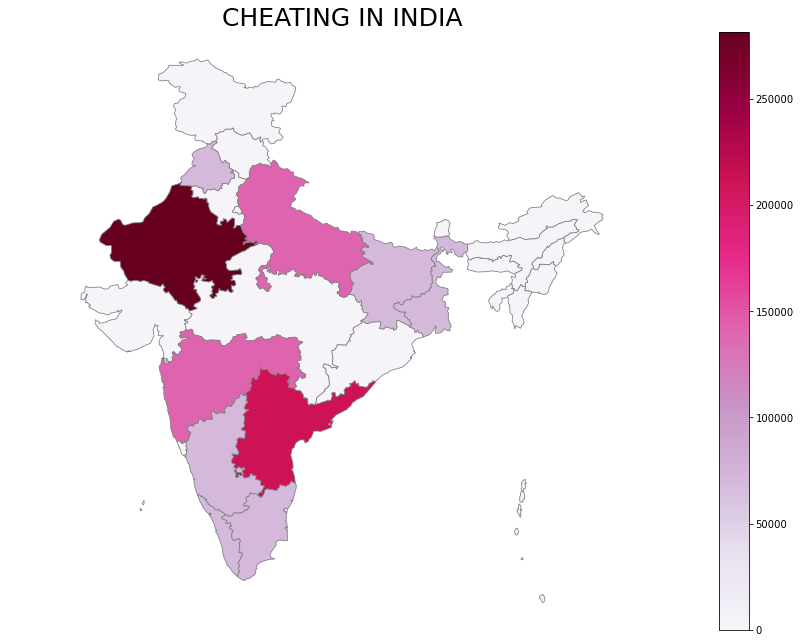

In [2887]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('CHEATING IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='CHEATING', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['CHEATING'].min(), vmax= merged_Ind["CHEATING"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

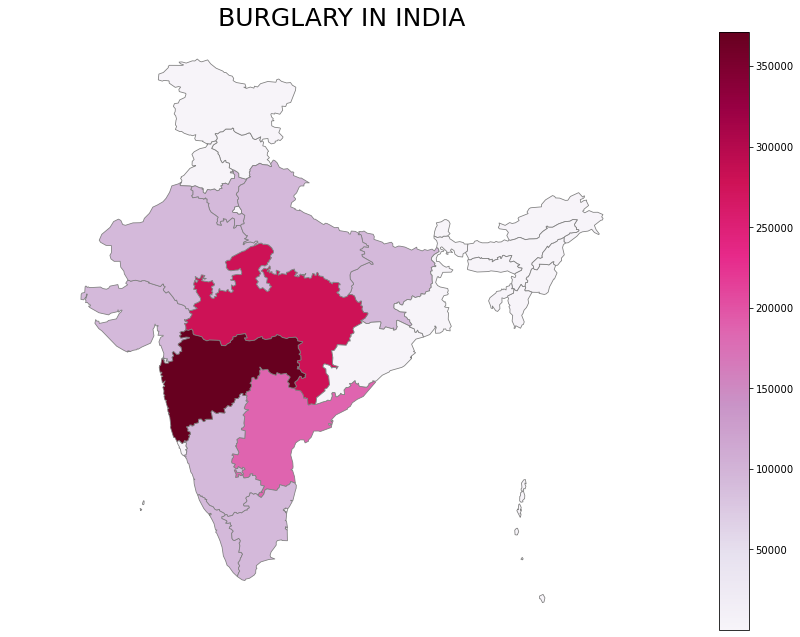

In [2888]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('BURGLARY IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='BURGLARY', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['BURGLARY'].min(), vmax= merged_Ind["BURGLARY"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

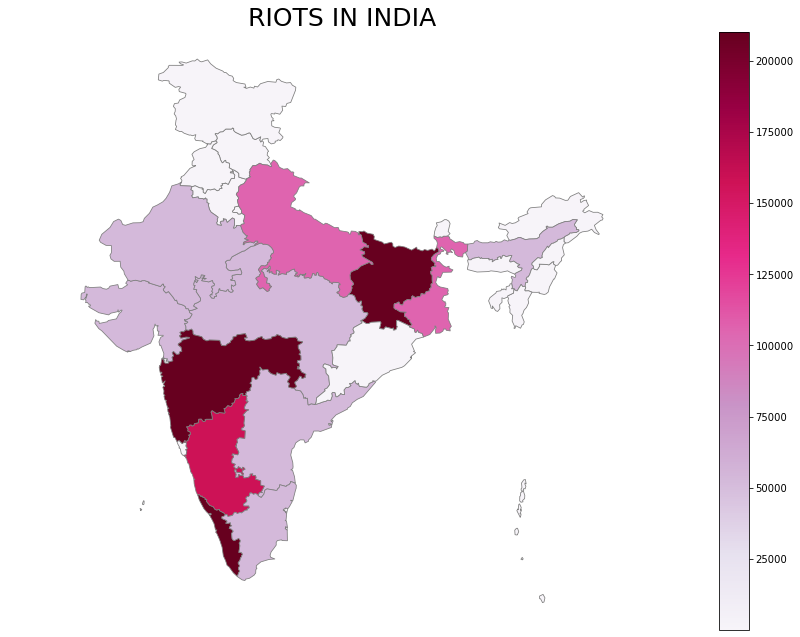

In [2889]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('RIOTS IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='RIOTS', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['RIOTS'].min(), vmax= merged_Ind["RIOTS"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

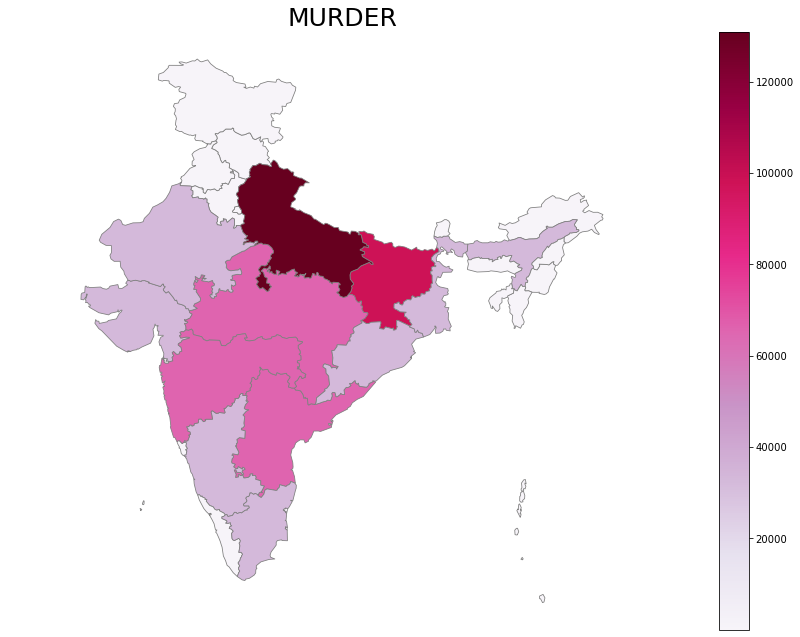

In [2890]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('MURDER', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='MURDER', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['MURDER'].min(), vmax= merged_Ind["MURDER"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

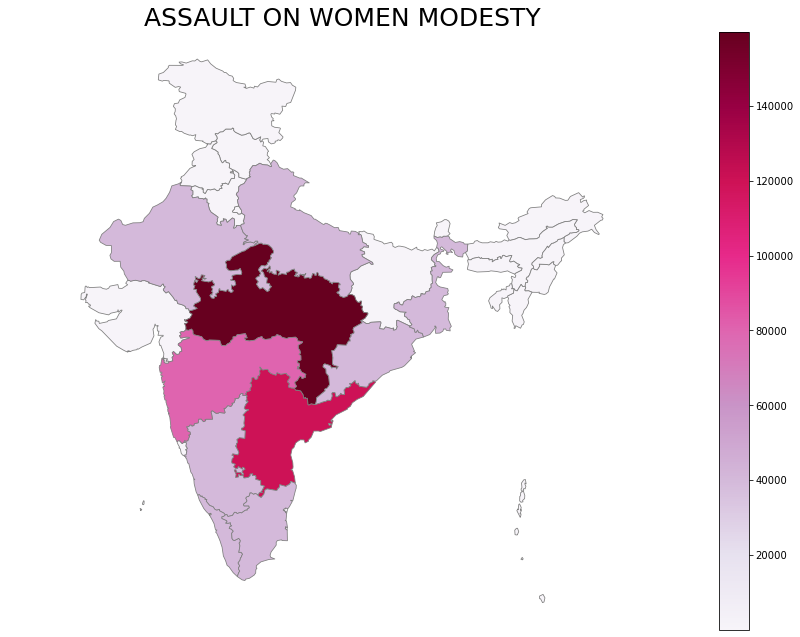

In [2891]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('ASSAULT ON WOMEN MODESTY', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='ASSAULT_WOMEN_MODESTY', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['ASSAULT_WOMEN_MODESTY'].min(), vmax= merged_Ind["ASSAULT_WOMEN_MODESTY"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

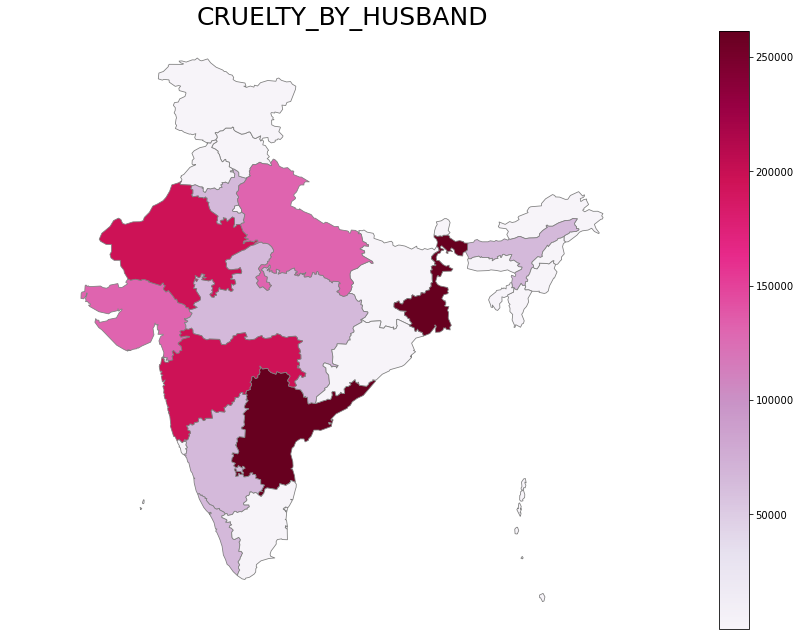

In [2892]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('CRUELTY_BY_HUSBAND', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='CRUELTY_BY_HUSBAND', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['CRUELTY_BY_HUSBAND'].min(), vmax= merged_Ind["CRUELTY_BY_HUSBAND"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

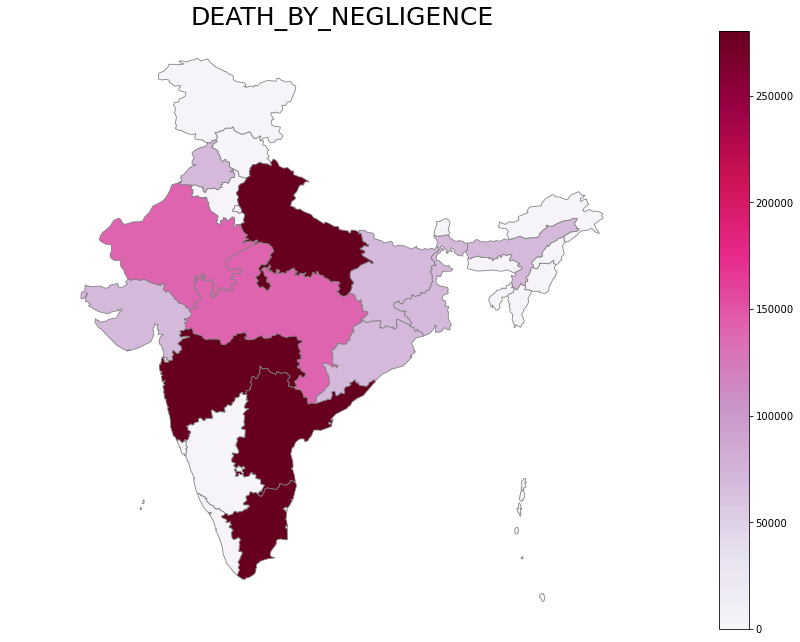

In [2893]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('DEATH_BY_NEGLIGENCE', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='DEATH_BY_NEGLIGENCE', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['DEATH_BY_NEGLIGENCE'].min(), vmax= merged_Ind["DEATH_BY_NEGLIGENCE"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

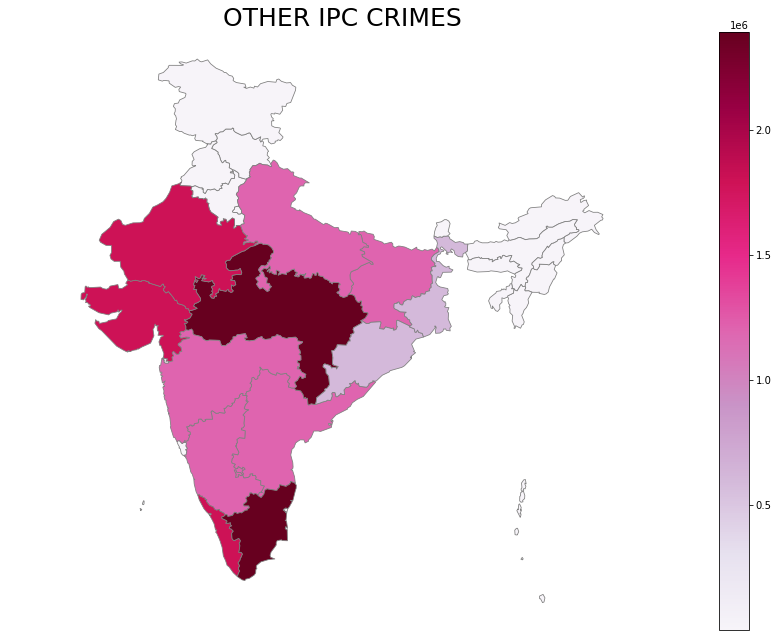

In [2894]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('OTHER IPC CRIMES', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='OTHER IPC CRIMES', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['OTHER IPC CRIMES'].min(), vmax= merged_Ind["OTHER IPC CRIMES"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [2895]:
crimes_total = crimes_df.groupby(['STATE', "YEAR"]).agg({"TOTAL": sum }).reset_index()

In [2896]:
crimes_total

STATE  YEAR   TOTAL
0    A & N ISLANDS  2001    1316
1    A & N ISLANDS  2002    1216
2    A & N ISLANDS  2003    1288
3    A & N ISLANDS  2004    1496
4    A & N ISLANDS  2005    1364
..             ...   ...     ...
415    WEST BENGAL  2008  210838
416    WEST BENGAL  2009  226072
417    WEST BENGAL  2010  259232
418    WEST BENGAL  2011  286394
419    WEST BENGAL  2012  322854

[420 rows x 3 columns]

In [2897]:
total_crime_yearwise = crimes_df.groupby(["YEAR"]).agg({"TOTAL": sum }).reset_index()
total_crime_yearwise


YEAR    TOTAL
0   2001  3538616
1   2002  3560660
2   2003  3432240
3   2004  3664020
4   2005  3645204
5   2006  3756586
6   2007  3979346
7   2008  4186758
8   2009  4242690
9   2010  4449662
10  2011  4651150
11  2012  4774376

In [2898]:
an_arim = ARIMA(total_crime_yearwise.TOTAL[:10].astype(np.float64).to_numpy(), order=(1,2,0))
an_model = an_arim.fit()
def get_mape(actual, predicted):
    y_actual = np.array(actual)
    y_pred = np.array(predicted)
    return np.round(np.mean(np.abs((y_actual - y_pred)/actual)) * 100,2)
forecast_an = an_model.predict(10,11)
forecast_an
forecast_an_df = an_model.forecast(steps=10)
forecast_an_df
get_mape(total_crime_yearwise.TOTAL[10:12],forecast_an)
i=12
for j in range(len(forecast_an_df)):
    total_crime_yearwise.loc[i] = total_crime_yearwise.YEAR[i-1]+1
    total_crime_yearwise.TOTAL[i] = forecast_an_df[j]
    i = i+1
fig = go.Figure()
fig.add_trace(go.Scatter(x= total_crime_yearwise["YEAR"], y= total_crime_yearwise['TOTAL'],
                    name = "INDIA",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= total_crime_yearwise["YEAR"][12:], y= total_crime_yearwise['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [505]:
#Crimes Trend in Andaman 
crime_AN_df = crimes_total[crimes_total.STATE=="A & N ISLANDS" ]
#ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_AN_df['TOTAL']),
#                                 model = "multiplicative", period=2)
#ts_plot = ts_decompose.plot()
crime_AN_df

STATE  YEAR  TOTAL
0   A & N ISLANDS  2001   1316
1   A & N ISLANDS  2002   1216
2   A & N ISLANDS  2003   1288
3   A & N ISLANDS  2004   1496
4   A & N ISLANDS  2005   1364
5   A & N ISLANDS  2006   1352
6   A & N ISLANDS  2007   1614
7   A & N ISLANDS  2008   1764
8   A & N ISLANDS  2009   1882
9   A & N ISLANDS  2010   1960
10  A & N ISLANDS  2011   1586
11  A & N ISLANDS  2012   1366

In [506]:
crime_AN_forecast = crime_AN_df.copy()
crime_AN_forecast.drop('STATE', axis = 1, inplace = True)

In [507]:
crime_AN_forecast

YEAR  TOTAL
0   2001   1316
1   2002   1216
2   2003   1288
3   2004   1496
4   2005   1364
5   2006   1352
6   2007   1614
7   2008   1764
8   2009   1882
9   2010   1960
10  2011   1586
11  2012   1366

In [514]:
def adfull(ts):
    result = adfuller(ts, autolag=None)
    result_out = pd.Series(result[0:4], index=["Test Stats",
                                              'P-value',
                                              'lags_used',
                                              'Number of observation'])
    print(result_out)
    

In [515]:
adfull(crime_AN_forecast.TOTAL)

Test Stats               0.777940
P-value                  0.991272
lags_used                4.000000
Number of observation    7.000000
dtype: float64


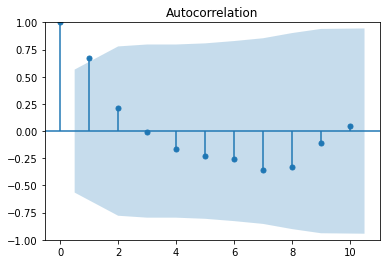

In [516]:
acf_plot = plot_acf(crime_AN_forecast.TOTAL, lags = 10)

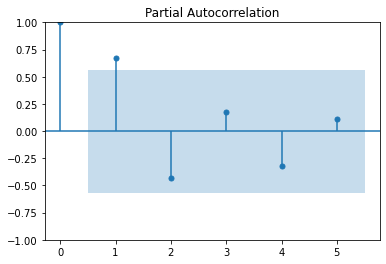

In [517]:
pcf_1 = plot_pacf(crime_AN_forecast.TOTAL, lags = 5, method='ywm')

In [1045]:
an_arim = ARIMA(crime_AN_forecast.TOTAL[:10].astype(np.float64).to_numpy(), order=(1,0,0))
an_model = an_arim.fit()
#print(an_model.summary())


In [1046]:
def get_mape(actual, predicted):
    y_actual = np.array(actual)
    y_pred = np.array(predicted)
    return np.round(np.mean(np.abs((y_actual - y_pred)/actual)) * 100,2)

In [1047]:
forecast_an = an_model.predict(10,12)
forecast_an

array([1912.57603603, 1871.2335549 , 1835.19268856])

In [1048]:
forecast_an_df = an_model.forecast(steps=10)
forecast_an_df

array([1912.57603603, 1871.2335549 , 1835.19268856, 1803.77357655,
       1776.38354127, 1752.50590808, 1731.69025883, 1713.54393544,
       1697.72463294, 1683.93394231])

In [1049]:
get_mape(crime_AN_forecast.TOTAL[10:13],forecast_an)

25.97

In [1050]:
i=12
for j in range(len(forecast_an_df)):
    crime_AN_forecast.loc[i] = crime_AN_forecast.YEAR[i-1]+1
    crime_AN_forecast.TOTAL[i] = forecast_an_df[j]
    i = i+1

In [1052]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crime_AN_df["YEAR"], y= crime_AN_df['TOTAL'],
                    name = "A&N",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crime_AN_forecast["YEAR"][11:], y= crime_AN_forecast['TOTAL'][11:],
                    name = "Estimated",line=dict(color='blue', width=4)))

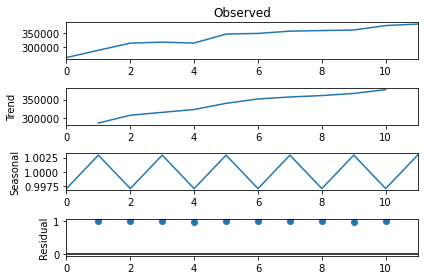

In [1143]:
#trend in Andhra Pradesh
crime_AP_df = crimes_total[crimes_total.STATE=='ANDHRA PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_AP_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [1144]:
crimes_AP_forecast = crime_AP_df.copy()
crimes_AP_forecast.drop(['STATE'], axis = 1, inplace = True)

In [1145]:
crimes_AP_forecast = crimes_AP_forecast.reset_index(drop = True)
crimes_AP_forecast

YEAR   TOTAL
0   2001  260178
1   2002  287220
2   2003  313902
3   2004  317512
4   2005  314246
5   2006  347818
6   2007  350174
7   2008  358550
8   2009  360882
9   2010  362876
10  2011  379560
11  2012  385044

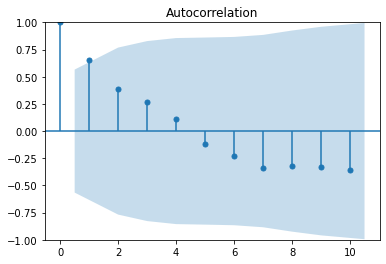

In [1146]:
acf_plot = plot_acf(crimes_AP_forecast.TOTAL, lags = 10)

In [1189]:
ap_arim = ARIMA(crimes_AP_forecast.TOTAL[:10].astype(np.float64).to_numpy(), order=(1,2,0))
ap_model = ap_arim.fit()
ap_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -90.289
Date:                Tue, 23 Nov 2021   AIC                            184.579
Time:                        20:21:05   BIC                            184.738
Sample:                             0   HQIC                           183.507
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0243      0.179     -0.136      0.892      -0.375       0.326
sigma2      3.244e+08    1.1e-10   2.96e+18      0.000    3.24e+08    3.24e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.70   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.10   Prob(JB):                         0.65
Heteroskedasticity (H):               0.10   Skew:                             0.79
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.68e+34. Standard errors may be unstable.
"""

In [1190]:
forecast_ap = ap_model.predict(10,12)
forecast_ap
#crimes_AP_forecast.TOTAL[10:13]

array([364878.20141282, 366880.20382217, 368882.21106025])

In [1191]:
get_mape(crimes_AP_forecast.TOTAL[10:13],forecast_ap)

5.14

In [1192]:
forecast_df = ap_model.forecast(steps=10)
forecast_df

array([364878.20141282, 366880.20382217, 368882.21106025, 370884.21818117,
       372886.22530492, 374888.23242861, 376890.23955229, 378892.24667598,
       380894.25379967, 382896.26092336])

In [1193]:
i=12
for j in range(len(forecast_df)):
    crimes_AP_forecast.loc[i] = crimes_AP_forecast.YEAR[i-1]+1
    crimes_AP_forecast.TOTAL[i] = forecast_df[j]
    i = i+1

In [1194]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crime_AP_df['YEAR'], y= crime_AP_df['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_AP_forecast["YEAR"][11:], y= crimes_AP_forecast['TOTAL'][11:],
                    name = "Estimated",line=dict(color='blue', width=4)))

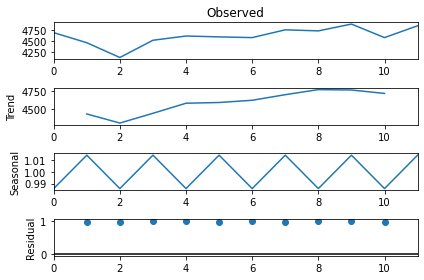

In [1201]:
#ARUNACHAL PRADESH
crime_ARU_df = crimes_total[crimes_total.STATE=='ARUNACHAL PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_ARU_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [1202]:
crimes_ARU_forecast = crime_ARU_df.copy()
crimes_ARU_forecast.drop(['STATE'], axis = 1, inplace = True)

In [1203]:
crimes_ARU_forecast = crimes_ARU_forecast.reset_index(drop = True)

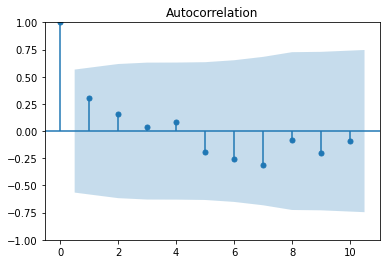

In [1204]:
acf_plot = plot_acf(crimes_ARU_forecast.TOTAL, lags = 10)

In [1205]:
crimes_ARU_forecast

YEAR  TOTAL
0   2001   4684
1   2002   4456
2   2003   4122
3   2004   4512
4   2005   4608
5   2006   4588
6   2007   4572
7   2008   4748
8   2009   4724
9   2010   4878
10  2011   4572
11  2012   4840

In [1206]:
aru_arim = ARIMA(crimes_ARU_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,0,0))
aru_model = aru_arim.fit()
aru_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -65.948
Date:                Tue, 23 Nov 2021   AIC                            137.897
Time:                        21:55:19   BIC                            138.804
Sample:                             0   HQIC                           136.901
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4616.5568    147.835     31.228      0.000    4326.805    4906.309
ar.L1          0.4525      0.484      0.936      0.349      -0.495       1.400
sigma2      3.061e+04   2.09e+04      1.464      0.143   -1.04e+04    7.16e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.68   Prob(JB):                         0.28
Heteroskedasticity (H):               0.32   Skew:                            -1.18
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1207]:
forecast_aru = aru_model.predict(10,12)
forecast_aru

array([4734.8709816 , 4670.0990084 , 4640.78693348])

In [1208]:
get_mape(crimes_AP_forecast.TOTAL[10:13],forecast_aru)

98.76

In [1209]:
forecast_df_aru = aru_model.forecast(steps=10)
forecast_df_aru

array([4734.8709816 , 4670.0990084 , 4640.78693348, 4627.52197188,
       4621.51901213, 4618.80241733, 4617.57304254, 4617.01669812,
       4616.76492859, 4616.65099216])

In [1210]:
i=12
for j in range(len(forecast_df_aru)):
    crimes_ARU_forecast.loc[i] = crimes_ARU_forecast.YEAR[i-1]+1
    crimes_ARU_forecast.TOTAL[i] = forecast_df_aru[j]
    i = i+1

In [573]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_ARU_forecast["YEAR"], y= crimes_ARU_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_ARU_forecast["YEAR"][12:], y= crimes_ARU_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

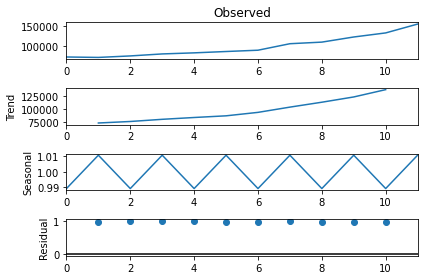

In [574]:
#ASSAM
crime_Assam_df = crimes_total[crimes_total.STATE=='ASSAM']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_Assam_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [575]:
def plot(dataframe):
	acf_plot = plot_acf(dataframe.TOTAL, lags = 10)
	pcf_1 = plot_pacf(dataframe.TOTAL, lags = 5 , method='ywm')
	return acf_plot, pcf_1

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

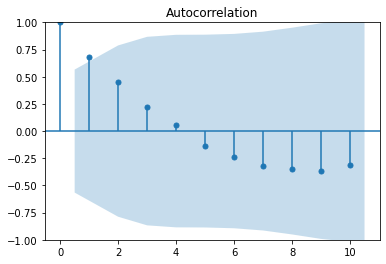

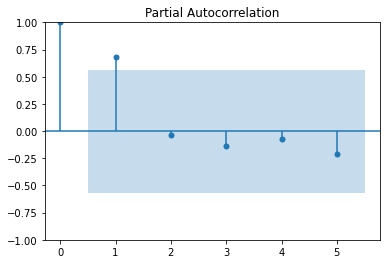

In [576]:
crimes_Assam_forecast = crime_Assam_df.copy()
crimes_Assam_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_Assam_forecast = crimes_Assam_forecast.reset_index(drop = True)
plot(crimes_Assam_forecast)

In [847]:
Assam_arim = ARIMA(crimes_Assam_forecast.TOTAL[:10].astype(np.float64).to_numpy(), order=(0,2,0))
Assam_moAssam = Assam_arim.fit()
Assam_moAssam.summary()
forecast_Assam = Assam_moAssam.predict(10,12)
forecast_Assam

array([136046., 148756., 161466.])

In [848]:
forecast_Assam = Assam_moAssam.predict(10,11)
forecast_Assam

array([136046., 148756.])

In [849]:
forecast_df_Assam = Assam_moAssam.forecast(steps=10)
forecast_df_Assam


array([136046., 148756., 161466., 174176., 186886., 199596., 212306.,
       225016., 237726., 250436.])

In [850]:
get_mape(crimes_Assam_forecast.TOTAL[10:12],forecast_Assam)


3.11

In [851]:
i=12
for j in range(len(forecast_df_Assam)):
    crimes_Assam_forecast.loc[i] = crimes_Assam_forecast.YEAR[i-1]+1
    crimes_Assam_forecast.TOTAL[i] = forecast_df_Assam[j]
    i = i+1

In [852]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_Assam_forecast["YEAR"], y= crimes_Assam_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_Assam_forecast["YEAR"][12:], y= crimes_Assam_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

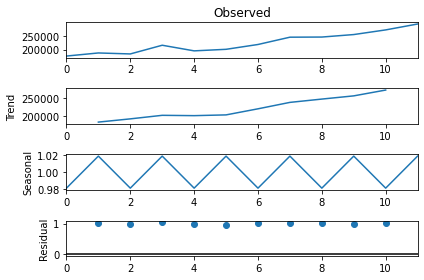

In [661]:
#BIHAR
crime_BIH_df = crimes_total[crimes_total.STATE=='BIHAR']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_BIH_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

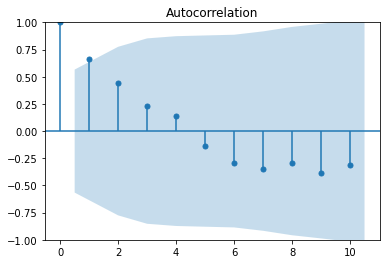

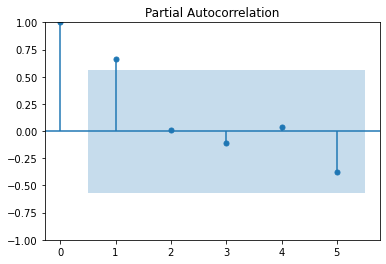

In [662]:
crimes_BIH_forecast = crime_BIH_df.copy()
crimes_BIH_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_BIH_forecast = crimes_BIH_forecast.reset_index(drop = True)
plot(crimes_BIH_forecast)

In [663]:
crimes_BIH_forecast

YEAR   TOTAL
0   2001  176864
1   2002  188080
2   2003  184526
3   2004  216120
4   2005  195700
5   2006  201330
6   2007  218840
7   2008  245338
8   2009  245862
9   2010  254906
10  2011  271792
11  2012  293228

In [834]:
BIH_arim = ARIMA(crimes_BIH_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,2,1))
BIH_mo = BIH_arim.fit()
BIH_mo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -92.064
Date:                Tue, 23 Nov 2021   AIC                            190.128
Time:                        12:22:29   BIC                            190.366
Sample:                             0   HQIC                           188.520
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5749      0.358      1.605      0.108      -0.127       1.277
ma.L1         -1.0000      0.510     -1.962      0.050      -1.999      -0.001
sigma2      5.196e+08   9.81e-10    5.3e+17      0.000     5.2e+08     5.2e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.31   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.04   Prob(JB):                         0.67
Heteroskedasticity (H):               0.18   Skew:                            -0.71
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+33. Standard errors may be unstable.
"""

In [835]:
forecast_BIH = BIH_mo.predict(10,12)
forecast_BIH

array([268392.8367203 , 284434.05575179, 301943.90156446])

In [836]:
forecast_df_BIH = BIH_mo.forecast(steps=10)
forecast_df_BIH


array([268392.8367203 , 284434.05575179, 301943.90156446, 320298.12553183,
       339137.81965221, 358256.63192378, 377535.92150141, 396907.47654315,
       416332.07905981, 435787.18090383])

In [837]:
get_mape(crimes_BIH_forecast.TOTAL[10:13],forecast_BIH)


7.62

In [838]:
i=12
for j in range(len(forecast_df_BIH)):
    crimes_BIH_forecast.loc[i] = crimes_BIH_forecast.YEAR[i-1]+1
    crimes_BIH_forecast.TOTAL[i] = forecast_df_BIH[j]
    i = i+1

In [839]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_BIH_forecast["YEAR"], y= crimes_BIH_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_BIH_forecast["YEAR"][12:], y= crimes_BIH_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

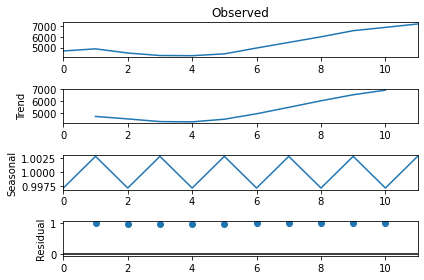

In [675]:
#GOA
crime_GOA_df = crimes_total[crimes_total.STATE=='GOA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_GOA_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

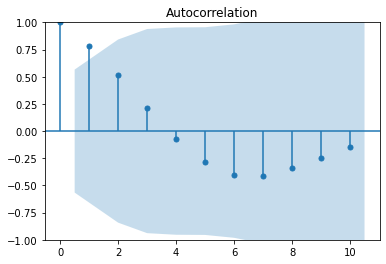

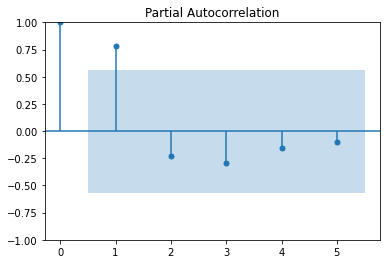

In [676]:
crimes_GOA_forecast = crime_GOA_df.copy()
crimes_GOA_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_GOA_forecast = crimes_GOA_forecast.reset_index(drop = True)
plot(crimes_GOA_forecast)

In [677]:
GOA_arim = ARIMA(crimes_GOA_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,1,0))
GOA_moGOA = GOA_arim.fit()
GOA_moGOA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -63.275
Date:                Tue, 23 Nov 2021   AIC                            130.550
Time:                        11:58:32   BIC                            130.944
Sample:                             0   HQIC                           129.698
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7002      0.229      3.056      0.002       0.251       1.149
sigma2      6.347e+04   2.79e+04      2.277      0.023    8841.685    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.83   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.18   Prob(JB):                         0.27
Heteroskedasticity (H):               0.29   Skew:                            -1.20
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [678]:
forecast_GOA = GOA_moGOA.predict(10,11)
forecast_GOA

array([6989.29944074, 7271.67867495])

In [679]:
forecast_df_GOA = GOA_moGOA.forecast(steps=10)
forecast_df_GOA

array([6989.29944074, 7271.67867495, 7469.39288889, 7607.82697207,
       7704.75472958, 7772.62089346, 7820.13892461, 7853.40974993,
       7876.70507154, 7893.01581837])

In [680]:
get_mape(crimes_GOA_forecast.TOTAL[10:13],forecast_GOA)

1.05

In [681]:
i=12
for j in range(len(forecast_df_GOA)):
    crimes_GOA_forecast.loc[i] = crimes_GOA_forecast.YEAR[i-1]+1
    crimes_GOA_forecast.TOTAL[i] = forecast_df_GOA[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_GOA_forecast["YEAR"], y= crimes_GOA_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_GOA_forecast["YEAR"][12:], y= crimes_GOA_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [ ]:
#GUJRAT

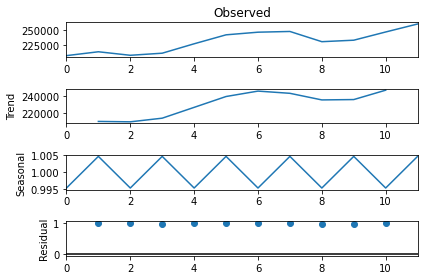

In [728]:
crime_GUJ_df = crimes_total[crimes_total.STATE=='GUJARAT']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_GUJ_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

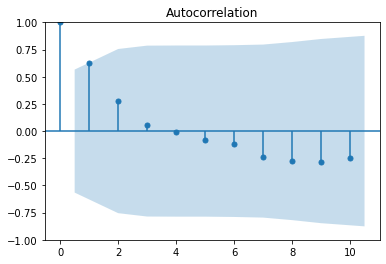

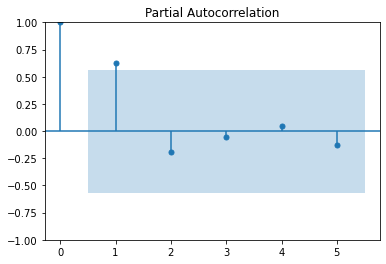

In [729]:
crimes_GUJ_forecast = crime_GUJ_df.copy()
crimes_GUJ_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_GUJ_forecast = crimes_GUJ_forecast.reset_index(drop = True)
plot(crimes_GUJ_forecast)

In [829]:
GUJ_arim = ARIMA(crimes_GUJ_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(0,2,1))
GUJ_moGUJ = GUJ_arim.fit()
GUJ_moGUJ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -86.420
Date:                Tue, 23 Nov 2021   AIC                            176.839
Time:                        12:21:46   BIC                            176.998
Sample:                             0   HQIC                           175.768
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0575      0.383      0.150      0.880      -0.692       0.807
sigma2      1.618e+08   8.22e-10   1.97e+17      0.000    1.62e+08    1.62e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.57   Prob(JB):                         0.88
Heteroskedasticity (H):               3.38   Skew:                             0.04
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.35e+33. Standard errors may be unstable.
"""

In [830]:
forecast_GUJ = GUJ_moGUJ.predict(10,12)
forecast_GUJ

array([236587.20144967, 240296.40289934, 244005.60434901])

In [831]:
forecast_df_GUJ = GUJ_moGUJ.forecast(steps=10)
forecast_df_GUJ


array([236587.20144967, 240296.40289934, 244005.60434901, 247714.80579867,
       251424.00724834, 255133.20869801, 258842.41014768, 262551.61159735,
       266260.81304702, 269970.01449668])

In [832]:
get_mape(crimes_GUJ_forecast.TOTAL[10:13],forecast_GUJ)


5.5

In [833]:
i=12
for j in range(len(forecast_df_GUJ)):
    crimes_GUJ_forecast.loc[i] = crimes_GUJ_forecast.YEAR[i-1]+1
    crimes_GUJ_forecast.TOTAL[i] = forecast_df_GUJ[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_GUJ_forecast["YEAR"], y= crimes_GUJ_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_GUJ_forecast["YEAR"][12:], y= crimes_GUJ_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [ ]:
#HARYANA

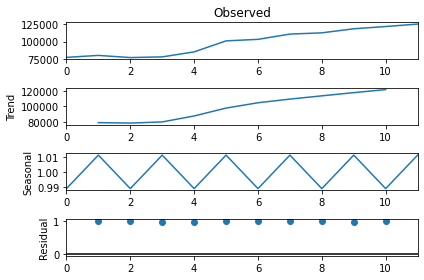

In [794]:
crime_HAR_df = crimes_total[crimes_total.STATE=='HARYANA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_HAR_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

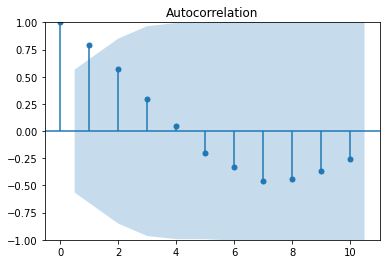

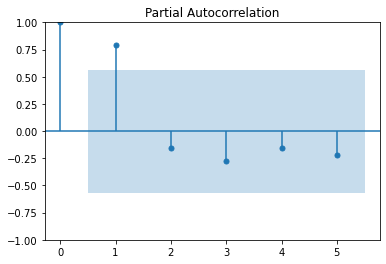

In [795]:
crimes_HAR_forecast = crime_HAR_df.copy()
crimes_HAR_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_HAR_forecast = crimes_HAR_forecast.reset_index(drop = True)
plot(crimes_HAR_forecast)

In [1414]:
HAR_arim = ARIMA(crimes_HAR_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,3,1))
HAR_moHAR = HAR_arim.fit()
HAR_moHAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 3, 1)   Log Likelihood                 -72.072
Date:                Tue, 23 Nov 2021   AIC                            150.143
Time:                        22:22:29   BIC                            149.981
Sample:                             0   HQIC                           148.138
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4469      0.419     -1.067      0.286      -1.268       0.374
ma.L1         -1.0000      0.731     -1.368      0.171      -2.432       0.432
sigma2      4.489e+07   1.63e-08   2.76e+15      0.000    4.49e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.98   Prob(JB):                         0.86
Heteroskedasticity (H):               0.24   Skew:                            -0.36
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.8e+32. Standard errors may be unstable.
"""

In [1415]:
forecast_HAR = HAR_moHAR.predict(10,12)
print('prediction',forecast_HAR)

forecast_df_HAR = HAR_moHAR.forecast(steps=10)
print('forecasting',forecast_df_HAR)

prediction [122621.81946021 128022.2616227  133360.31873453]
forecasting [122621.81946021 128022.2616227  133360.31873453 139119.11308594
 145082.72842036 151347.66169269 157870.78663511 164671.37717164
 171740.81943038 179082.96310944]


In [1416]:
get_mape(crimes_HAR_forecast.TOTAL[10:13],forecast_HAR)


4.49

In [1417]:
i=12
for j in range(len(forecast_df_HAR)):
    crimes_HAR_forecast.loc[i] = crimes_HAR_forecast.YEAR[i-1]+1
    crimes_HAR_forecast.TOTAL[i] = forecast_df_HAR[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_HAR_forecast["YEAR"], y= crimes_HAR_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_HAR_forecast["YEAR"][12:], y= crimes_HAR_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [1211]:
#crime in HIMACHAL Pradesh

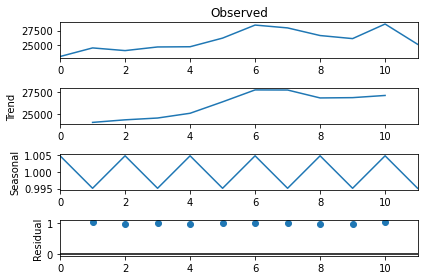

In [1212]:
crime_HIM_df = crimes_total[crimes_total.STATE=='HIMACHAL PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_HIM_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

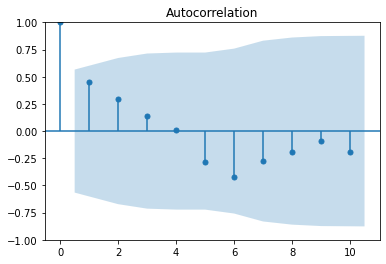

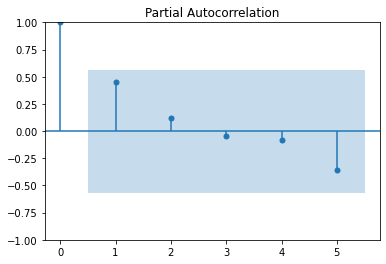

In [1213]:
crimes_HIM_forecast = crime_HIM_df.copy()
crimes_HIM_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_HIM_forecast = crimes_HIM_forecast.reset_index(drop = True)
plot(crimes_HIM_forecast)

In [1390]:
HIM_arim = ARIMA(crimes_HIM_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,3,0))
HIM_moHIM = HIM_arim.fit()
HIM_moHIM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 3, 0)   Log Likelihood                 -61.716
Date:                Tue, 23 Nov 2021   AIC                            131.431
Time:                        22:12:50   BIC                            131.215
Sample:                             0   HQIC                           128.757
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0208      0.386     -0.054      0.957      -0.777       0.735
ar.L2         -0.1913      0.233     -0.821      0.411      -0.648       0.265
ar.L3          0.1250      0.268      0.467      0.640      -0.399       0.650
sigma2      2.532e+06   2.79e+06      0.906      0.365   -2.95e+06    8.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.80   Prob(JB):                         0.55
Heteroskedasticity (H):               2.02   Skew:                            -0.98
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1391]:
forecast_HIM = HIM_moHIM.predict(10,11)
print('prediction',forecast_HIM)

forecast_df_HIM = HIM_moHIM.forecast(steps=10)
print('forecasting',forecast_df_HIM)

prediction [25515.71920824 24830.77942356]
forecasting [25515.71920824 24830.77942356 24407.6206577  24143.59955449
 23964.57363241 23937.29826233 24061.73396813 24315.83762813
 24708.42341702 25243.52045256]


In [1392]:
get_mape(crimes_HIM_forecast.TOTAL[10:12],forecast_HIM)


5.99

In [1393]:
i=12
for j in range(len(forecast_df_HIM)):
    crimes_HIM_forecast.loc[i] = crimes_HIM_forecast.YEAR[i-1]+1
    crimes_HIM_forecast.TOTAL[i] = forecast_df_HIM[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_HIM_forecast["YEAR"], y= crimes_HIM_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_HIM_forecast["YEAR"][12:], y= crimes_HIM_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

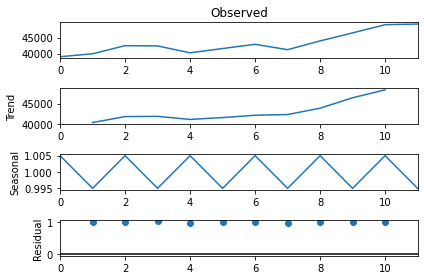

In [1418]:
crime_JK_df = crimes_total[crimes_total.STATE=='JAMMU & KASHMIR']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_JK_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

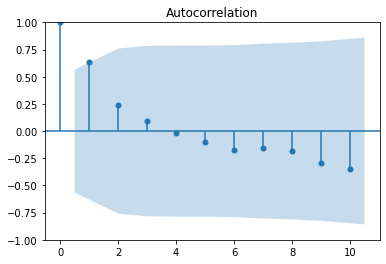

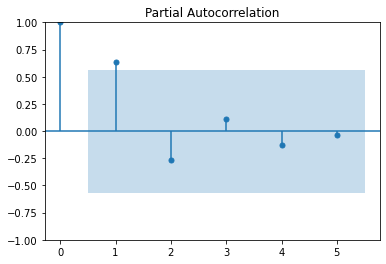

In [1419]:
crimes_JK_forecast = crime_JK_df.copy()
crimes_JK_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_JK_forecast = crimes_JK_forecast.reset_index(drop = True)
plot(crimes_JK_forecast)

In [1450]:
JK_arim = ARIMA(crimes_JK_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,0,0))
JK_moJK = JK_arim.fit()
JK_moJK.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -89.062
Date:                Tue, 23 Nov 2021   AIC                            186.124
Time:                        22:34:25   BIC                            187.335
Sample:                             0   HQIC                           184.797
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.201e+04    779.942     53.861      0.000    4.05e+04    4.35e+04
ar.L1          0.6754      0.539      1.253      0.210      -0.381       1.732
ar.L2         -0.3849      0.688     -0.560      0.576      -1.732       0.963
sigma2      2.924e+06   2.09e+06      1.397      0.162   -1.18e+06    7.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.68   Prob(JB):                         0.74
Heteroskedasticity (H):               2.75   Skew:                             0.30
Prob(H) (two-sided):                  0.43   Kurtosis:                         1.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1451]:
forecast_JK = JK_moJK.predict(10,11)
print('prediction',forecast_JK)
forecast_df_JK = JK_moJK.forecast(steps=10)
print('forecasting',forecast_df_JK)

prediction [44258.3826783  41820.30424436]
forecasting [44258.3826783  41820.30424436 41015.5864077  41410.40296011
 41986.75548404 42224.06635295 42162.52927937 42029.63774357
 41963.56804645 41970.08982508]


In [1452]:
get_mape(crimes_JK_forecast.TOTAL[10:12],forecast_JK)

	

12.36

In [1453]:
i=12
for j in range(len(forecast_df_JK)):
    crimes_JK_forecast.loc[i] = crimes_JK_forecast.YEAR[i-1]+1
    crimes_JK_forecast.TOTAL[i] = forecast_df_JK[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_JK_forecast["YEAR"], y= crimes_JK_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_JK_forecast["YEAR"][12:], y= crimes_JK_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

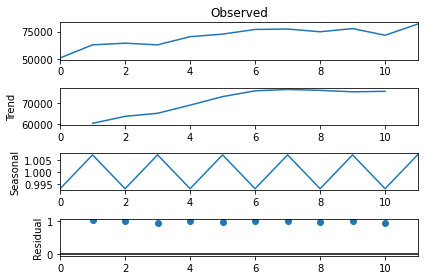

In [1454]:
crime_JAR_df = crimes_total[crimes_total.STATE=='JHARKHAND']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_JAR_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

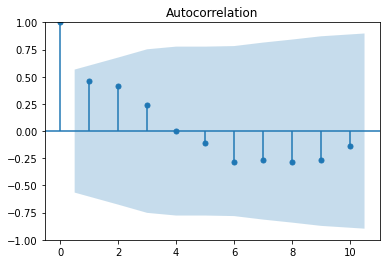

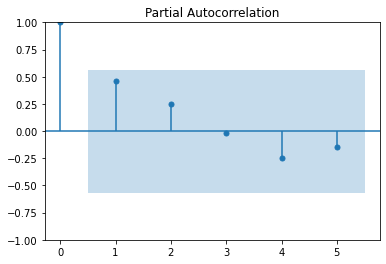

In [1455]:
crimes_JAR_forecast = crime_JAR_df.copy()
crimes_JAR_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_JAR_forecast = crimes_JAR_forecast.reset_index(drop = True)
plot(crimes_JAR_forecast)

In [1862]:
JAR_arim = ARIMA(crimes_JAR_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,1,0))
JAR_moJAR = JAR_arim.fit()
JAR_moJAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -85.816
Date:                Tue, 23 Nov 2021   AIC                            175.632
Time:                        23:44:26   BIC                            176.026
Sample:                             0   HQIC                           174.781
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2402      0.328      0.733      0.464      -0.402       0.883
sigma2      1.203e+07   5.58e+06      2.154      0.031    1.08e+06     2.3e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.36   Prob(JB):                         0.57
Heteroskedasticity (H):               3.33   Skew:                             0.86
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1863]:
forecast_JAR = JAR_moJAR.predict(10,12)
print('prediction',forecast_JAR)
forecast_df_JAR = JAR_moJAR.forecast(steps=10)
print('forecasting',forecast_df_JAR)

prediction [78476.12110633 78643.83379701 78684.12415116]
forecasting [78476.12110633 78643.83379701 78684.12415116 78693.80327938
 78696.12853874 78696.68714598 78696.82134265 78696.8535813
 78696.86132613 78696.86318671]


In [1864]:
get_mape(crimes_JAR_forecast.TOTAL[10:13],forecast_JAR)


4.87

In [1865]:
i=12
for j in range(len(forecast_df_JAR)):
    crimes_JAR_forecast.loc[i] = crimes_JAR_forecast.YEAR[i-1]+1
    crimes_JAR_forecast.TOTAL[i] = forecast_df_JAR[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_JAR_forecast["YEAR"], y= crimes_JAR_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_JAR_forecast["YEAR"][12:], y= crimes_JAR_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

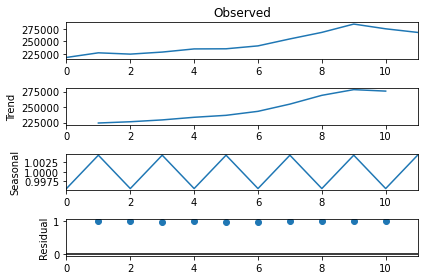

In [1580]:
crime_KAR_df = crimes_total[crimes_total.STATE=='KARNATAKA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_KAR_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

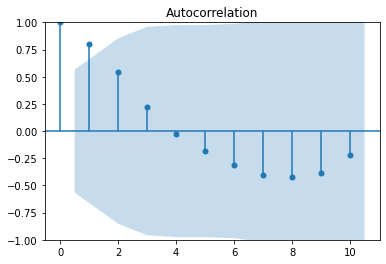

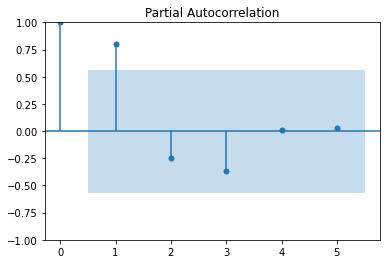

In [1581]:
crimes_KAR_forecast = crime_KAR_df.copy()
crimes_KAR_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_KAR_forecast = crimes_KAR_forecast.reset_index(drop = True)
plot(crimes_KAR_forecast)

In [1633]:
KAR_arim = ARIMA(crimes_KAR_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,1,0))
KAR_moKAR = KAR_arim.fit()
KAR_moKAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -95.589
Date:                Tue, 23 Nov 2021   AIC                            195.177
Time:                        23:01:01   BIC                            195.572
Sample:                             0   HQIC                           194.326
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0530      0.077      0.685      0.494      -0.099       0.205
sigma2      4.051e+07   3.17e-10   1.28e+17      0.000    4.05e+07    4.05e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.32   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.07   Prob(JB):                         0.71
Heteroskedasticity (H):              18.64   Skew:                             0.13
Prob(H) (two-sided):                  0.04   Kurtosis:                         1.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.8e+33. Standard errors may be unstable.
"""

In [1634]:
forecast_KAR = KAR_moKAR.predict(10,12)
print('prediction',forecast_KAR)
forecast_df_KAR = KAR_moKAR.forecast(steps=10)
print('forecasting',forecast_df_KAR)

prediction [285520.88446255 285567.3172138  285569.775919  ]
forecasting [285520.88446255 285567.3172138  285569.775919   285569.90611226
 285569.91300625 285569.9133713  285569.91339063 285569.91339165
 285569.91339171 285569.91339171]


In [1635]:
get_mape(crimes_KAR_forecast.TOTAL[10:13],forecast_KAR)


5.18

In [1636]:
i=12
for j in range(len(forecast_df_KAR)):
    crimes_KAR_forecast.loc[i] = crimes_KAR_forecast.YEAR[i-1]+1
    crimes_KAR_forecast.TOTAL[i] = forecast_df_KAR[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_KAR_forecast["YEAR"], y= crimes_KAR_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_KAR_forecast["YEAR"][12:], y= crimes_KAR_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

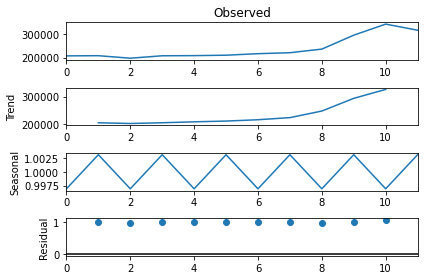

In [1637]:
crime_KER_df = crimes_total[crimes_total.STATE=='KERALA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_KER_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

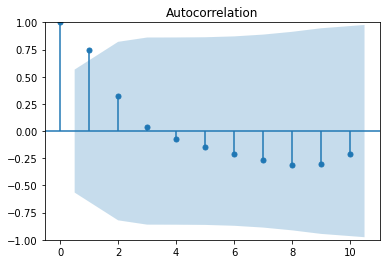

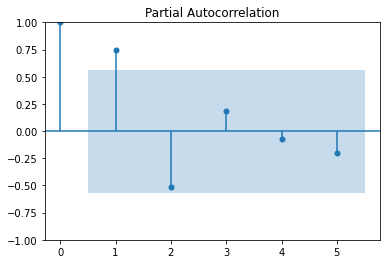

In [1638]:
crimes_KER_forecast = crime_KER_df.copy()
crimes_KER_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_KER_forecast = crimes_KER_forecast.reset_index(drop = True)
plot(crimes_KER_forecast)

In [1715]:
KER_arim = ARIMA(crimes_KER_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(0,1,0))
KER_moKER = KER_arim.fit()
KER_moKER.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -102.530
Date:                Tue, 23 Nov 2021   AIC                            207.059
Time:                        23:10:17   BIC                            207.256
Sample:                             0   HQIC                           206.633
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.115e+08   1.02e+08      4.045      0.000    2.12e+08    6.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 7.62
Prob(Q):                              0.56   Prob(JB):                         0.02
Heteroskedasticity (H):              17.14   Skew:                             1.86
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1716]:
forecast_KER = KER_moKER.predict(10,12)
print('prediction',forecast_KER)
forecast_df_KER = KER_moKER.forecast(steps=10)
print('forecasting',forecast_df_KER)

prediction [296626. 296626. 296626.]
forecasting [296626. 296626. 296626. 296626. 296626. 296626. 296626. 296626. 296626.
 296626.]


In [1717]:
get_mape(crimes_KER_forecast.TOTAL[10:13],forecast_KER)


7.02

In [1718]:
i=12
for j in range(len(forecast_df_KER)):
    crimes_KER_forecast.loc[i] = crimes_KER_forecast.YEAR[i-1]+1
    crimes_KER_forecast.TOTAL[i] = forecast_df_KER[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_KER_forecast["YEAR"], y= crimes_KER_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_KER_forecast["YEAR"][12:], y= crimes_KER_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

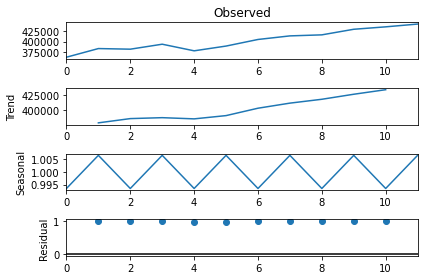

In [1719]:
crime_MP_df = crimes_total[crimes_total.STATE=='MADHYA PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MP_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

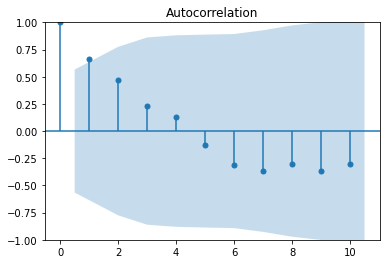

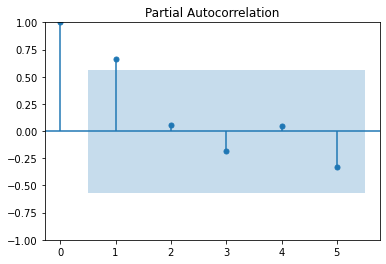

In [1720]:
crimes_MP_forecast = crime_MP_df.copy()
crimes_MP_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MP_forecast = crimes_MP_forecast.reset_index(drop = True)
plot(crimes_MP_forecast)

In [1785]:
MP_arim = ARIMA(crimes_MP_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,0,0))
MP_moMP = MP_arim.fit()
MP_moMP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -109.057
Date:                Tue, 23 Nov 2021   AIC                            224.114
Time:                        23:18:05   BIC                            225.022
Sample:                             0   HQIC                           223.118
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.953e+05   1.96e+04     20.152      0.000    3.57e+05    4.34e+05
ar.L1          0.8826      0.215      4.114      0.000       0.462       1.303
sigma2      1.348e+08      0.765   1.76e+08      0.000    1.35e+08    1.35e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.78   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.18   Prob(JB):                         0.50
Heteroskedasticity (H):               0.69   Skew:                            -0.83
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.62e+24. Standard errors may be unstable.
"""

In [1786]:
forecast_MP = MP_moMP.predict(10,12)
print('prediction',forecast_MP)
forecast_df_MP = MP_moMP.forecast(steps=10)
print('forecasting',forecast_df_MP)


prediction [424633.27946121 421186.83767649 418144.88861574]
forecasting [424633.27946121 421186.83767649 418144.88861574 415459.9588632
 413090.14673548 410998.46835343 409152.28046253 407522.77099407
 406084.50941685 404815.04986198]


In [1787]:
get_mape(crimes_MP_forecast.TOTAL[10:13],forecast_MP)

	

3.07

In [1788]:
i=12
for j in range(len(forecast_df_MP)):
    crimes_MP_forecast.loc[i] = crimes_MP_forecast.YEAR[i-1]+1
    crimes_MP_forecast.TOTAL[i] = forecast_df_MP[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MP_forecast["YEAR"], y= crimes_MP_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MP_forecast["YEAR"][13:], y= crimes_MP_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

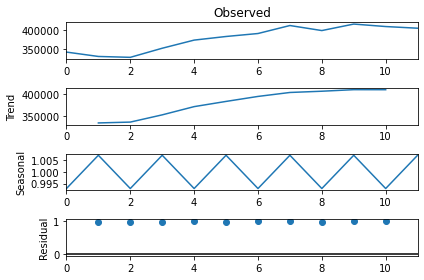

In [1789]:
crime_MAH_df = crimes_total[crimes_total.STATE=='MAHARASHTRA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MAH_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

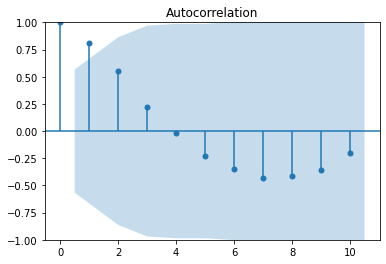

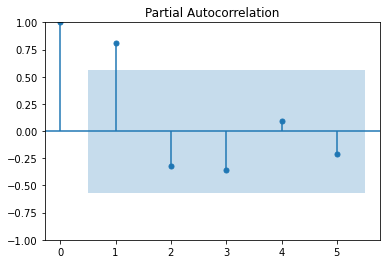

In [1790]:
crimes_MAH_forecast = crime_MAH_df.copy()
crimes_MAH_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MAH_forecast = crimes_MAH_forecast.reset_index(drop = True)
plot(crimes_MAH_forecast)

In [1844]:
MAH_arim = ARIMA(crimes_MAH_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,0))
MAH_moMAH = MAH_arim.fit()
MAH_moMAH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -88.998
Date:                Tue, 23 Nov 2021   AIC                            183.995
Time:                        23:41:25   BIC                            184.234
Sample:                             0   HQIC                           182.388
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1219      0.177     -0.688      0.491      -0.469       0.225
ar.L2         -0.0881      0.162     -0.543      0.587      -0.406       0.230
sigma2      2.195e+08   3.48e-10    6.3e+17      0.000     2.2e+08     2.2e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.88   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.03   Prob(JB):                         0.99
Heteroskedasticity (H):              68.59   Skew:                            -0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.61e+33. Standard errors may be unstable.
"""

In [1845]:
forecast_MAH = MAH_moMAH.predict(10,12)
print('prediction',forecast_MAH)
forecast_df_MAH = MAH_moMAH.forecast(steps=10)
print('forecasting',forecast_df_MAH)

prediction [432794.67263177 446654.69639591 460891.55004464]
forecasting [432794.67263177 446654.69639591 460891.55004464 475311.47771707
 489675.87897527 504030.91537274 518391.98676534 532753.14776334
 547113.76599185 561474.44248964]


In [1846]:
get_mape(crimes_MAH_forecast.TOTAL[10:13],forecast_MAH)


8.87

In [1847]:
i=12
for j in range(len(forecast_df_MAH)):
    crimes_MAH_forecast.loc[i] = crimes_MAH_forecast.YEAR[i-1]+1
    crimes_MAH_forecast.TOTAL[i] = forecast_df_MAH[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MAH_forecast["YEAR"], y= crimes_MAH_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MAH_forecast["YEAR"][12:], y= crimes_MAH_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

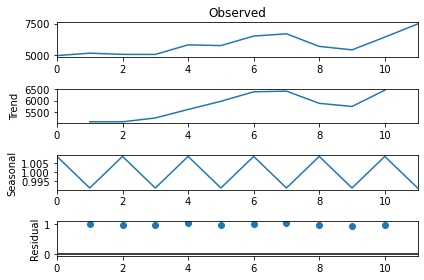

In [1849]:
crime_MAN_df = crimes_total[crimes_total.STATE=='MANIPUR']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MAN_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

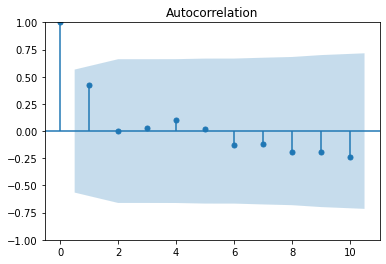

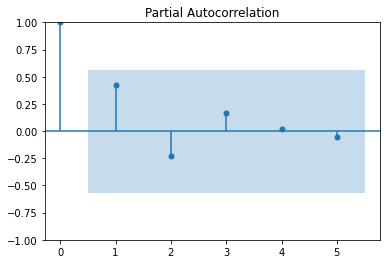

In [1850]:
crimes_MAN_forecast = crime_MAN_df.copy()
crimes_MAN_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MAN_forecast = crimes_MAN_forecast.reset_index(drop = True)
plot(crimes_MAN_forecast)

In [1929]:
MAN_arim = ARIMA(crimes_MAN_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,0,0))
MAN_moMAN = MAN_arim.fit()
MAN_moMAN.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -74.916
Date:                Tue, 23 Nov 2021   AIC                            159.833
Time:                        23:52:35   BIC                            161.346
Sample:                             0   HQIC                           158.173
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5560.0599    491.021     11.323      0.000    4597.676    6522.444
ar.L1          0.7100      1.057      0.672      0.502      -1.362       2.782
ar.L2         -0.0566      0.947     -0.060      0.952      -1.913       1.800
ar.L3         -0.2460      1.380     -0.178      0.859      -2.951       2.459
sigma2      1.739e+05   3.67e+05      0.474      0.635   -5.45e+05    8.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.76   Prob(JB):                         0.64
Heteroskedasticity (H):               2.11   Skew:                             0.40
Prob(H) (two-sided):                  0.56   Kurtosis:                         1.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1930]:
forecast_MAN = MAN_moMAN.predict(10,12)
print('prediction',forecast_MAN)
forecast_df_MAN = MAN_moMAN.forecast(steps=10)
print('forecasting',forecast_df_MAN)

prediction [5179.67118815 5261.94875343 5401.94073529]
forecasting [5179.67118815 5261.94875343 5401.94073529 5558.24557505 5641.05376623
 5656.55975984 5624.43255048 5580.37607403 5547.1021719  5533.87571203]


In [1933]:
get_mape(crimes_MAN_forecast.TOTAL[10:13],forecast_MAN)


17.81

In [1934]:
i=12
for j in range(len(forecast_df_MAN)):
    crimes_MAN_forecast.loc[i] = crimes_MAN_forecast.YEAR[i-1]+1
    crimes_MAN_forecast.TOTAL[i] = forecast_df_MAN[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MAN_forecast["YEAR"], y= crimes_MAN_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MAN_forecast["YEAR"][12:], y= crimes_MAN_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

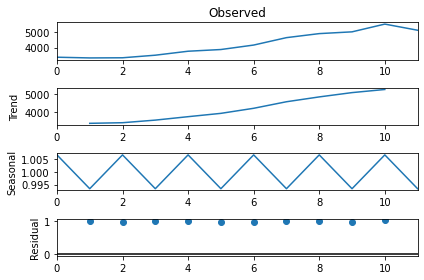

In [1935]:
crime_MEG_df = crimes_total[crimes_total.STATE=='MEGHALAYA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MEG_df['TOTAL']),
                                 model = "multiplicative",period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

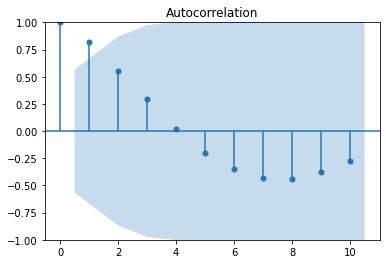

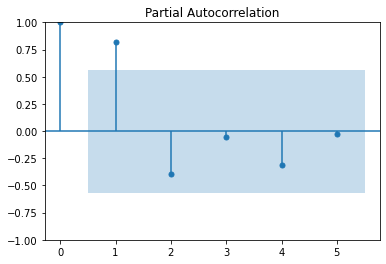

In [1936]:
crimes_MEG_forecast = crime_MEG_df.copy()
crimes_MEG_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MEG_forecast = crimes_MEG_forecast.reset_index(drop = True)
plot(crimes_MEG_forecast)


In [1949]:
MEG_arim = ARIMA(crimes_MEG_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,3,2))
MEG_moMEG = MEG_arim.fit()
MEG_moMEG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 3, 2)   Log Likelihood                 -43.984
Date:                Tue, 23 Nov 2021   AIC                             99.967
Time:                        23:55:25   BIC                             99.643
Sample:                             0   HQIC                            95.956
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3539      0.795     -1.703      0.089      -2.912       0.204
ar.L2         -1.2436      0.682     -1.824      0.068      -2.580       0.092
ar.L3         -0.8824      0.253     -3.485      0.000      -1.379      -0.386
ma.L1          0.6247      2.870      0.218      0.828      -4.999       6.249
ma.L2         -0.3106      1.389     -0.224      0.823      -3.033       2.412
sigma2      9380.2349      0.000   2.62e+07      0.000    9380.234    9380.236
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.68   Prob(JB):                         0.68
Heteroskedasticity (H):               5.92   Skew:                            -0.35
Prob(H) (two-sided):                  0.29   Kurtosis:                         1.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.78e+23. Standard errors may be unstable.
"""

In [1950]:
forecast_MEG = MEG_moMEG.predict(10,12)
print('prediction',forecast_MEG)
forecast_df_MEG = MEG_moMEG.forecast(steps=10)
print('forecasting',forecast_df_MEG)

prediction [5384.69429375 5762.45632979 5922.77042489]
forecasting [5384.69429375 5762.45632979 5922.77042489 6125.72336731 6520.75386309
 6776.66593494 6926.51612036 7205.57552121 7546.44521858 7718.61596301]


In [1952]:
get_mape(crimes_MEG_forecast.TOTAL[10:13],forecast_MEG)


8.32

In [1953]:
i=12
for j in range(len(forecast_df_MEG)):
    crimes_MEG_forecast.loc[i] = crimes_MEG_forecast.YEAR[i-1]+1
    crimes_MEG_forecast.TOTAL[i] = forecast_df_MEG[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MEG_forecast["YEAR"], y= crimes_MEG_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MEG_forecast["YEAR"][13:], y= crimes_MEG_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

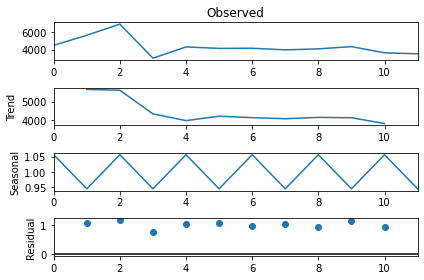

In [1954]:
crime_MIZ_df = crimes_total[crimes_total.STATE=='MIZORAM']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MIZ_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

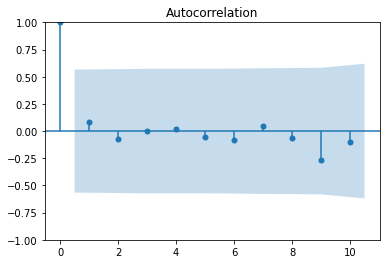

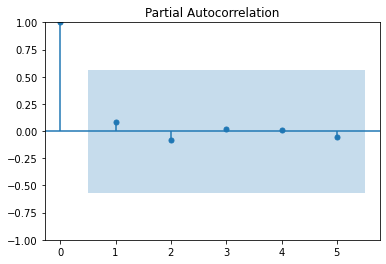

In [1955]:
crimes_MIZ_forecast = crime_MIZ_df.copy()
crimes_MIZ_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MIZ_forecast = crimes_MIZ_forecast.reset_index(drop = True)
plot(crimes_MIZ_forecast)


In [1977]:
MIZ_arim = ARIMA(crimes_MIZ_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,2,0))
MIZ_moMIZ = MIZ_arim.fit()
MIZ_moMIZ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 2, 0)   Log Likelihood                 -73.789
Date:                Tue, 23 Nov 2021   AIC                            155.578
Time:                        23:59:18   BIC                            155.896
Sample:                             0   HQIC                           153.435
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6512      0.751     -0.868      0.386      -2.122       0.820
ar.L2         -0.7871      0.552     -1.425      0.154      -1.870       0.296
ar.L3         -0.8903      0.206     -4.331      0.000      -1.293      -0.487
sigma2      4.728e+06   4.31e-08    1.1e+14      0.000    4.73e+06    4.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.30   Prob(JB):                         0.82
Heteroskedasticity (H):               0.64   Skew:                             0.36
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.82e+30. Standard errors may be unstable.
"""

In [1978]:
forecast_MIZ = MIZ_moMIZ.predict(10,12)
print('prediction',forecast_MIZ)
forecast_df_MIZ = MIZ_moMIZ.forecast(steps=10)
print('forecasting',forecast_df_MIZ)

prediction [4458.02792578 4282.53976757 4283.43537354]
forecasting [4458.02792578 4282.53976757 4283.43537354 4522.38917526 4721.67781195
 4602.38367799 4509.8235097  4685.93394696 4949.67772845 4921.07950403]


In [1979]:
get_mape(crimes_MIZ_forecast.TOTAL[10:13],forecast_MIZ)


16.21

In [1980]:
i=12
for j in range(len(forecast_df_MIZ)):
    crimes_MIZ_forecast.loc[i] = crimes_MIZ_forecast.YEAR[i-1]+1
    crimes_MIZ_forecast.TOTAL[i] = forecast_df_MIZ[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MIZ_forecast["YEAR"], y= crimes_MIZ_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MIZ_forecast["YEAR"][12:], y= crimes_MIZ_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

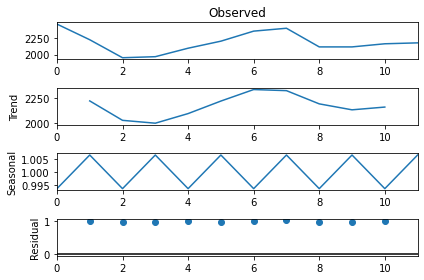

In [1981]:
crime_NAG_df = crimes_total[crimes_total.STATE=='NAGALAND']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_NAG_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

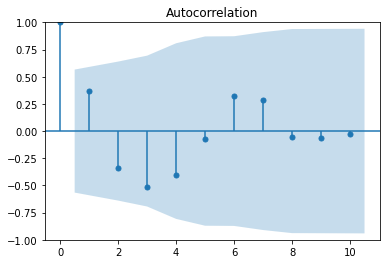

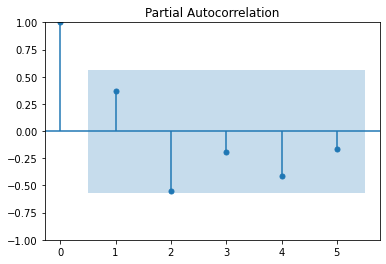

In [1982]:
crimes_NAG_forecast = crime_NAG_df.copy()
crimes_NAG_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_NAG_forecast = crimes_NAG_forecast.reset_index(drop = True)
plot(crimes_NAG_forecast)

In [1993]:
NAG_arim = ARIMA(crimes_NAG_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
NAG_moNAG = NAG_arim.fit()
NAG_moNAG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -57.492
Date:                Wed, 24 Nov 2021   AIC                            120.983
Time:                        00:06:51   BIC                            121.575
Sample:                             0   HQIC                           119.707
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4198      0.366      1.147      0.252      -0.298       1.137
ar.L2         -0.6450      0.436     -1.479      0.139      -1.500       0.210
sigma2      1.868e+04   1.67e+04      1.121      0.262    -1.4e+04    5.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.93   Prob(JB):                         0.74
Heteroskedasticity (H):               1.24   Skew:                             0.04
Prob(H) (two-sided):                  0.86   Kurtosis:                         1.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1994]:
forecast_NAG = NAG_moNAG.predict(10,12)
print('prediction',forecast_NAG)
forecast_df_NAG = NAG_moNAG.forecast(steps=10)
print('forecasting',forecast_df_NAG)

prediction [2302.47722351 2379.91632906 2293.43093625]
forecasting [2302.47722351 2379.91632906 2293.43093625 2207.17626758 2226.75389304
 2290.6085496  2304.78513714 2269.54826168 2245.61241105 2258.29339078]


In [1995]:
get_mape(crimes_NAG_forecast.TOTAL[10:13],forecast_NAG)


6.73

In [1996]:
i=12
for j in range(len(forecast_df_NAG)):
    crimes_NAG_forecast.loc[i] = crimes_NAG_forecast.YEAR[i-1]+1
    crimes_NAG_forecast.TOTAL[i] = forecast_df_NAG[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_NAG_forecast["YEAR"], y= crimes_NAG_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_NAG_forecast["YEAR"][12:], y= crimes_NAG_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

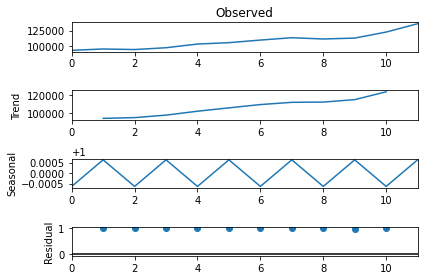

In [1997]:
crime_ODI_df = crimes_total[crimes_total.STATE=='ODISHA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_ODI_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

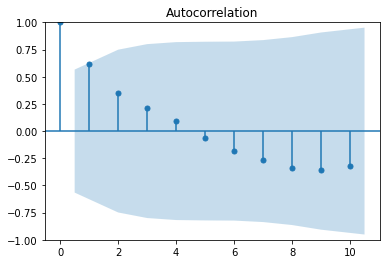

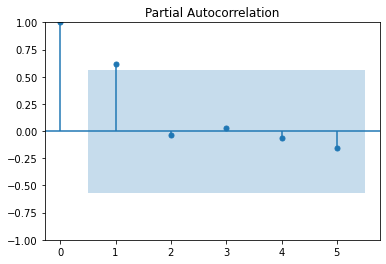

In [1998]:
crimes_ODI_forecast = crime_ODI_df.copy()
crimes_ODI_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_ODI_forecast = crimes_ODI_forecast.reset_index(drop = True)
plot(crimes_ODI_forecast)


In [2035]:
ODI_arim = ARIMA(crimes_ODI_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,1))
ODI_moODI = ODI_arim.fit()
ODI_moODI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -76.110
Date:                Wed, 24 Nov 2021   AIC                            160.219
Time:                        00:11:40   BIC                            160.537
Sample:                             0   HQIC                           158.076
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9666      0.243     -3.979      0.000      -1.443      -0.490
ar.L2          0.0240      0.242      0.099      0.921      -0.450       0.499
ma.L1          1.0000      1.018      0.983      0.326      -0.995       2.995
sigma2      1.072e+07   9.49e-08   1.13e+14      0.000    1.07e+07    1.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.24   Prob(JB):                         0.63
Heteroskedasticity (H):               1.56   Skew:                            -0.50
Prob(H) (two-sided):                  0.72   Kurtosis:                         1.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.66e+30. Standard errors may be unstable.
"""

In [2036]:
forecast_ODI = ODI_moODI.predict(10,12)
print('prediction',forecast_ODI)
forecast_df_ODI = ODI_moODI.forecast(steps=10)
print('forecasting',forecast_df_ODI)

prediction [113805.2111596  115308.16042484 116202.72178629]
forecasting [113805.2111596  115308.16042484 116202.72178629 117700.12797636
 118600.22374162 120092.14735121 120997.67539817 122484.2165886
 123395.07765048 124876.33477677]


In [2037]:
get_mape(crimes_ODI_forecast.TOTAL[10:13],forecast_ODI)


7.88

In [2038]:
i=12
for j in range(len(forecast_df_ODI)):
    crimes_ODI_forecast.loc[i] = crimes_ODI_forecast.YEAR[i-1]+1
    crimes_ODI_forecast.TOTAL[i] = forecast_df_ODI[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_ODI_forecast["YEAR"], y= crimes_ODI_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_ODI_forecast["YEAR"][12:], y= crimes_ODI_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

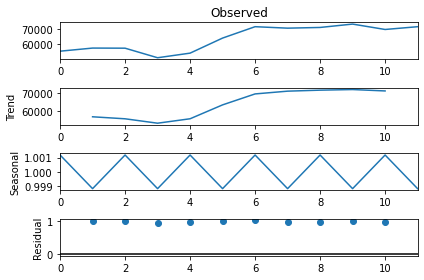

In [2039]:
crime_PUN_df = crimes_total[crimes_total.STATE=='PUNJAB']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_PUN_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

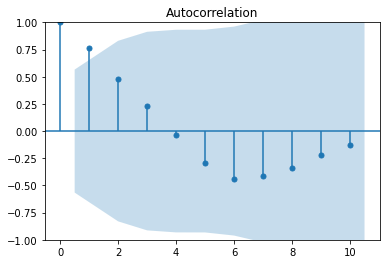

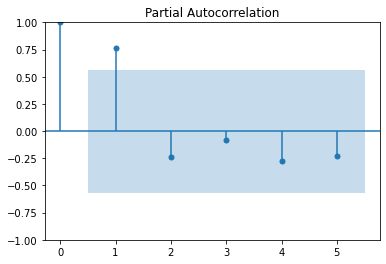

In [2040]:
crimes_PUN_forecast = crime_PUN_df.copy()
crimes_PUN_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_PUN_forecast = crimes_PUN_forecast.reset_index(drop = True)
plot(crimes_PUN_forecast)


In [2223]:
PUN_arim = ARIMA(crimes_PUN_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,1))
PUN_moPUN = PUN_arim.fit()
PUN_moPUN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -88.886
Date:                Wed, 24 Nov 2021   AIC                            185.772
Time:                        00:23:47   BIC                            186.561
Sample:                             0   HQIC                           184.069
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9381     11.570     -0.081      0.935     -23.615      21.739
ar.L2          0.0617      0.549      0.112      0.911      -1.015       1.138
ma.L1          0.9997     12.079      0.083      0.934     -22.674      24.673
sigma2      2.212e+07   1.77e-05   1.25e+12      0.000    2.21e+07    2.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.34   Prob(JB):                         0.92
Heteroskedasticity (H):               0.17   Skew:                             0.24
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+28. Standard errors may be unstable.
"""

In [2224]:
forecast_PUN = PUN_moPUN.predict(10,12)
print('prediction',forecast_PUN)
forecast_df_PUN = PUN_moPUN.forecast(steps=10)
print('forecasting',forecast_df_PUN)


prediction [73437.7792104  73440.83421739 73446.71284769]
forecasting [73437.7792104  73440.83421739 73446.71284769 73441.38642828
 73446.7458134  73441.38956156 73446.74490726 73441.39060489
 73446.74387261 73441.39163986]


In [2225]:
get_mape(crimes_PUN_forecast.TOTAL[10:13],forecast_PUN)


3.56

In [2226]:
i=12
for j in range(len(forecast_df_PUN)):
    crimes_PUN_forecast.loc[i] = crimes_PUN_forecast.YEAR[i-1]+1
    crimes_PUN_forecast.TOTAL[i] = forecast_df_PUN[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_PUN_forecast["YEAR"], y= crimes_PUN_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_PUN_forecast["YEAR"][12:], y= crimes_PUN_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

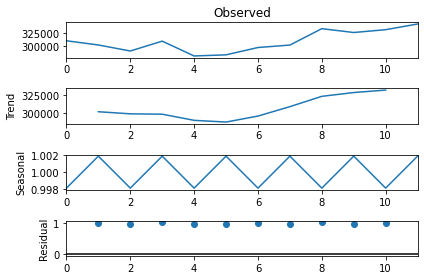

In [2227]:
crime_RAJ_df = crimes_total[crimes_total.STATE=='RAJASTHAN']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_RAJ_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

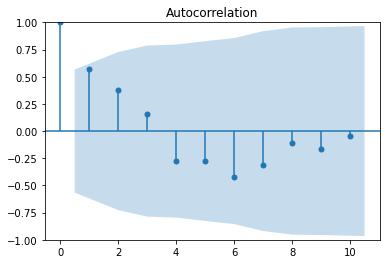

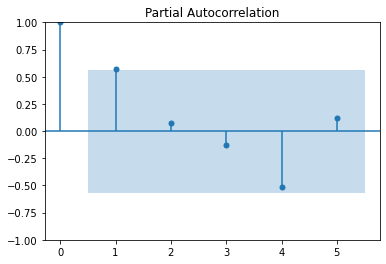

In [2228]:
crimes_RAJ_forecast = crime_RAJ_df.copy()
crimes_RAJ_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_RAJ_forecast = crimes_RAJ_forecast.reset_index(drop = True)
plot(crimes_RAJ_forecast)

In [2273]:
RAJ_arim = ARIMA(crimes_RAJ_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,1,1))
RAJ_moRAJ = RAJ_arim.fit()
RAJ_moRAJ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -100.074
Date:                Wed, 24 Nov 2021   AIC                            206.149
Time:                        00:28:18   BIC                            206.740
Sample:                             0   HQIC                           204.872
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7618      0.648     -1.176      0.240      -2.032       0.508
ma.L1          0.7869      0.617      1.276      0.202      -0.422       1.996
sigma2      2.633e+08   1.65e-09   1.59e+17      0.000    2.63e+08    2.63e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.45   Prob(JB):                         0.88
Heteroskedasticity (H):               2.37   Skew:                             0.26
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.26e+33. Standard errors may be unstable.
"""

In [2274]:
forecast_RAJ = RAJ_moRAJ.predict(10,12)
print('prediction',forecast_RAJ)
forecast_df_RAJ = RAJ_moRAJ.forecast(steps=10)
print('forecasting',forecast_df_RAJ)

prediction [324541.20867797 325587.06476376 324790.283101  ]
forecasting [324541.20867797 325587.06476376 324790.283101   325397.30831865
 324934.84835994 325287.17180087 325018.75546624 325223.24747649
 325067.45598074 325186.14516629]


In [2275]:
get_mape(crimes_RAJ_forecast.TOTAL[10:13],forecast_RAJ)

2.4

In [2276]:
i=12
for j in range(len(forecast_df_RAJ)):
    crimes_RAJ_forecast.loc[i] = crimes_RAJ_forecast.YEAR[i-1]+1
    crimes_RAJ_forecast.TOTAL[i] = forecast_df_RAJ[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_RAJ_forecast["YEAR"], y= crimes_RAJ_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_RAJ_forecast["YEAR"][12:], y= crimes_RAJ_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

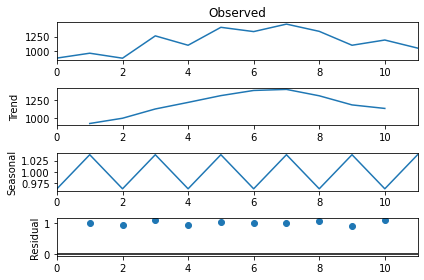

In [2277]:
crime_SIK_df = crimes_total[crimes_total.STATE=='SIKKIM']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_SIK_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

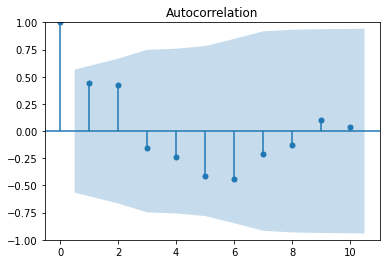

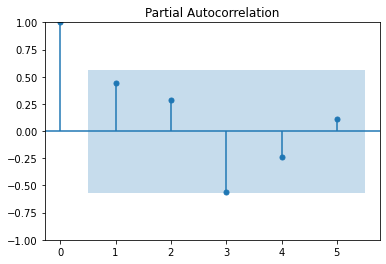

In [2278]:

crimes_SIK_forecast = crime_SIK_df.copy()
crimes_SIK_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_SIK_forecast = crimes_SIK_forecast.reset_index(drop = True)
plot(crimes_SIK_forecast)


In [2304]:
SIK_arim = ARIMA(crimes_SIK_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
SIK_moSIK = SIK_arim.fit()
SIK_moSIK.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -58.784
Date:                Wed, 24 Nov 2021   AIC                            123.568
Time:                        00:31:27   BIC                            124.159
Sample:                             0   HQIC                           122.291
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.882     -0.261      0.794      -1.957       1.498
ar.L2          0.3965      0.763      0.519      0.603      -1.100       1.893
sigma2      2.585e+04   1.11e+04      2.337      0.019    4175.255    4.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.80   Prob(JB):                         0.97
Heteroskedasticity (H):               0.88   Skew:                            -0.06
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2305]:
forecast_SIK = SIK_moSIK.predict(10,12)
print('prediction',forecast_SIK)
forecast_df_SIK = SIK_moSIK.forecast(steps=10)
print('forecasting',forecast_df_SIK)


prediction [1109.38455978 1015.35540338 1039.09455722]
forecasting [1109.38455978 1015.35540338 1039.09455722  996.35331824 1015.5871386
  994.21910761 1006.75569215  995.40188545 1002.9818557   996.73798051]


In [2306]:
get_mape(crimes_SIK_forecast.TOTAL[10:13],forecast_SIK)


5.44

In [2307]:
i=12
for j in range(len(forecast_df_SIK)):
    crimes_SIK_forecast.loc[i] = crimes_SIK_forecast.YEAR[i-1]+1
    crimes_SIK_forecast.TOTAL[i] = forecast_df_SIK[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_SIK_forecast["YEAR"], y= crimes_SIK_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_SIK_forecast["YEAR"][12:], y= crimes_SIK_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

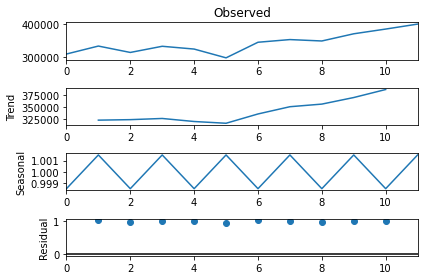

In [2308]:
crime_TN_df = crimes_total[crimes_total.STATE=='TAMIL NADU']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_TN_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

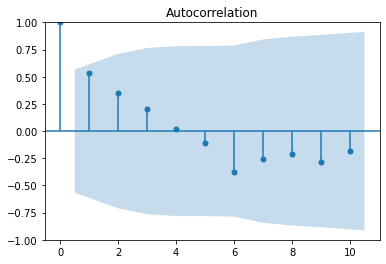

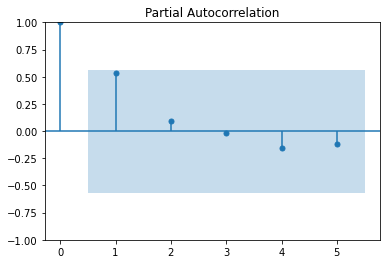

In [2309]:
crimes_TN_forecast = crime_TN_df.copy()
crimes_TN_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_TN_forecast = crimes_TN_forecast.reset_index(drop = True)
plot(crimes_TN_forecast)

In [2903]:
TN_arim = ARIMA(crimes_TN_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,0))
TN_moTN = TN_arim.fit()
TN_moTN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -95.825
Date:                Wed, 24 Nov 2021   AIC                            197.650
Time:                        13:20:38   BIC                            197.888
Sample:                             0   HQIC                           196.043
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0990      0.093     -1.065      0.287      -0.281       0.083
ar.L2         -0.1880      0.064     -2.919      0.004      -0.314      -0.062
sigma2      4.493e+08   5.26e-11   8.54e+18      0.000    4.49e+08    4.49e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.36   Prob(JB):                         0.30
Heteroskedasticity (H):               0.99   Skew:                             1.30
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.05e+34. Standard errors may be unstable.
"""

In [2904]:
forecast_TN = TN_moTN.predict(10,12)
print('prediction',forecast_TN)
forecast_df_TN = TN_moTN.forecast(steps=10)
print('forecasting',forecast_df_TN)


prediction [393071.04631359 409873.97035401 427211.72133779]
forecasting [393071.04631359 409873.97035401 427211.72133779 445420.25486607
 463442.03799561 481318.55456737 499244.56547337 517192.99514543
 535129.89884673 553063.72743152]


In [2905]:
get_mape(crimes_TN_forecast.TOTAL[10:13],forecast_TN)


4.09

In [2906]:
i=12
for j in range(len(forecast_df_TN)):
    crimes_TN_forecast.loc[i] = crimes_TN_forecast.YEAR[i-1]+1
    crimes_TN_forecast.TOTAL[i] = forecast_df_TN[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_TN_forecast["YEAR"], y= crimes_TN_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_TN_forecast["YEAR"][12:], y= crimes_TN_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

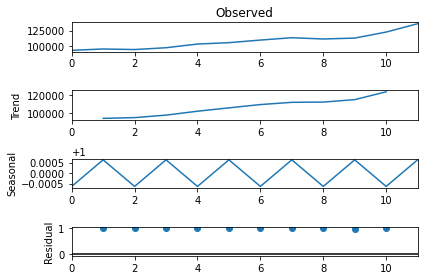

In [2366]:
crime_TRI_df = crimes_total[crimes_total.STATE=='TRIPURA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_ODI_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

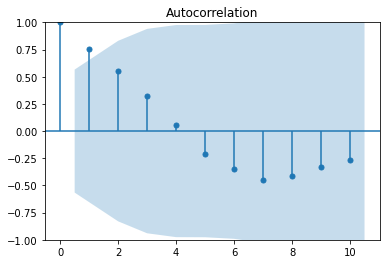

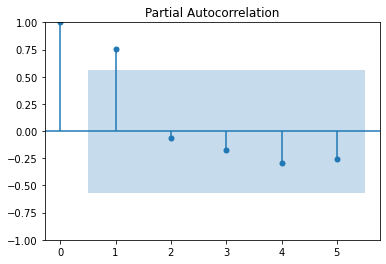

In [2367]:
crimes_TRI_forecast = crime_TRI_df.copy()
crimes_TRI_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_TRI_forecast = crimes_TRI_forecast.reset_index(drop = True)
plot(crimes_TRI_forecast)

In [2406]:
TRI_arim = ARIMA(crimes_TRI_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
TRI_moTRI = TRI_arim.fit()
TRI_moTRI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -73.419
Date:                Wed, 24 Nov 2021   AIC                            152.838
Time:                        00:40:11   BIC                            153.429
Sample:                             0   HQIC                           151.561
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1623      0.476      0.341      0.733      -0.770       1.095
ar.L2          0.3054      0.329      0.928      0.353      -0.339       0.950
sigma2      7.008e+05   4.06e+05      1.728      0.084   -9.41e+04     1.5e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.97   Prob(JB):                         0.94
Heteroskedasticity (H):               2.04   Skew:                             0.23
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2407]:
forecast_TRI = TRI_moTRI.predict(10,12)
print('prediction',forecast_TRI)
forecast_df_TRI = TRI_moTRI.forecast(steps=10)
print('forecasting',forecast_df_TRI)

prediction [11805.15632263 12031.65525333 12128.01011929]
forecasting [11805.15632263 12031.65525333 12128.01011929 12212.81405768
 12256.00130843 12288.90699418 12307.43555207 12320.49106977
 12328.26799523 12333.51692207]


In [2408]:
get_mape(crimes_TRI_forecast.TOTAL[10:13],forecast_TRI)


3.72

In [2409]:
i=12
for j in range(len(forecast_df_TRI)):
    crimes_TRI_forecast.loc[i] = crimes_TRI_forecast.YEAR[i-1]+1
    crimes_TRI_forecast.TOTAL[i] = forecast_df_TRI[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_TRI_forecast["YEAR"], y= crimes_TRI_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_TRI_forecast["YEAR"][12:], y= crimes_TRI_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

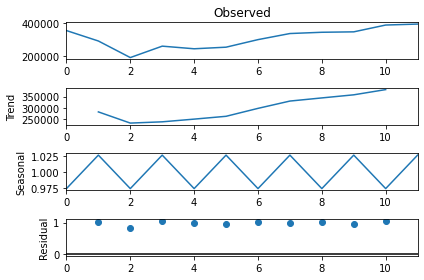

In [2410]:
crime_UP_df = crimes_total[crimes_total.STATE=='UTTAR PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_UP_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

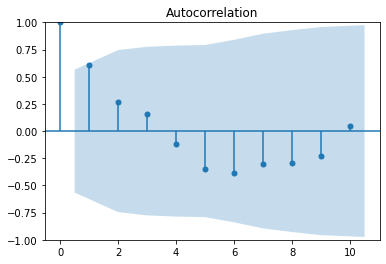

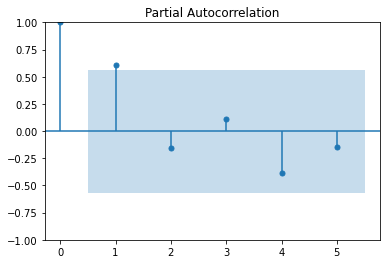

In [2411]:
crimes_UP_forecast = crime_UP_df.copy()
crimes_UP_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_UP_forecast = crimes_UP_forecast.reset_index(drop = True)
plot(crimes_UP_forecast)

In [2472]:
UP_arim = ARIMA(crimes_UP_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,0))
UP_moUP = UP_arim.fit()
UP_moUP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -96.227
Date:                Wed, 24 Nov 2021   AIC                            198.454
Time:                        00:45:03   BIC                            198.692
Sample:                             0   HQIC                           196.846
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3013      0.053     -5.637      0.000      -0.406      -0.197
ar.L2         -0.3775      0.055     -6.832      0.000      -0.486      -0.269
sigma2      4.678e+08   1.56e-11   2.99e+19      0.000    4.68e+08    4.68e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.36   Prob(JB):                         0.70
Heteroskedasticity (H):               0.24   Skew:                             0.73
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.72e+34. Standard errors may be unstable.
"""

In [2473]:
forecast_UP = UP_moUP.predict(10,12)
print('prediction',forecast_UP)
forecast_df_UP = UP_moUP.forecast(steps=10)
print('forecasting',forecast_df_UP)

prediction [363720.7313251  377192.74086751 386413.31167705]
forecasting [363720.7313251  377192.74086751 386413.31167705 397628.41467389
 409847.31182078 421010.94712806 432113.6299182  443632.98594213
 455049.81280485 466340.2561233 ]


In [2474]:
get_mape(crimes_UP_forecast.TOTAL[10:13],forecast_UP)


7.81

In [2475]:
i=12
for j in range(len(forecast_df_UP)):
    crimes_UP_forecast.loc[i] = crimes_UP_forecast.YEAR[i-1]+1
    crimes_UP_forecast.TOTAL[i] = forecast_df_UP[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_UP_forecast["YEAR"], y= crimes_UP_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_UP_forecast["YEAR"][12:], y= crimes_UP_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

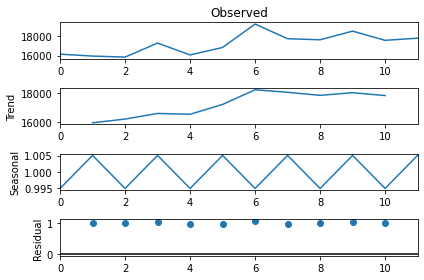

In [2476]:
crime_UK_df = crimes_total[crimes_total.STATE=='UTTARAKHAND']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_UK_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

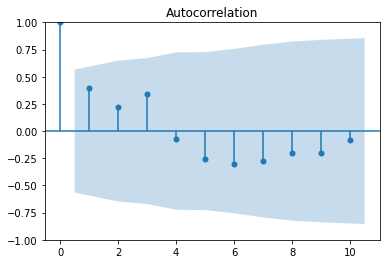

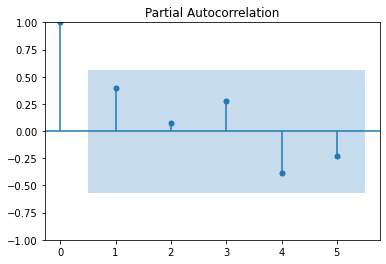

In [2477]:
crimes_UK_forecast = crime_UK_df.copy()
crimes_UK_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_UK_forecast = crimes_UK_forecast.reset_index(drop = True)
plot(crimes_UK_forecast)

In [2494]:
UK_arim = ARIMA(crimes_UK_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,1))
UK_moUK = UK_arim.fit()
UK_moUK.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -69.024
Date:                Wed, 24 Nov 2021   AIC                            146.049
Time:                        00:47:01   BIC                            146.367
Sample:                             0   HQIC                           143.906
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7286      0.227     -3.214      0.001      -1.173      -0.284
ar.L2         -0.4174      0.163     -2.561      0.010      -0.737      -0.098
ma.L1          0.4981      0.376      1.324      0.186      -0.239       1.236
sigma2      1.196e+06   1.08e+06      1.104      0.270   -9.28e+05    3.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.45   Prob(JB):                         0.80
Heteroskedasticity (H):               2.07   Skew:                            -0.37
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2495]:
forecast_UK = UK_moUK.predict(10,12)
print('prediction',forecast_UK)
forecast_df_UK = UK_moUK.forecast(steps=10)
print('forecasting',forecast_df_UK)


prediction [18121.62235178 18251.87916103 18541.35077245]
forecasting [18121.62235178 18251.87916103 18541.35077245 18510.86387647
 18647.03952025 18795.33708998 18865.23777524 18987.19801359
 19103.9510098  19202.76829177]


In [2496]:
get_mape(crimes_UK_forecast.TOTAL[10:13],forecast_UK)


2.21

In [2498]:
i=12
for j in range(len(forecast_df_UK)):
    crimes_UK_forecast.loc[i] = crimes_UK_forecast.YEAR[i-1]+1
    crimes_UK_forecast.TOTAL[i] = forecast_df_UK[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_UK_forecast["YEAR"], y= crimes_UK_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_UK_forecast["YEAR"][12:], y= crimes_UK_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

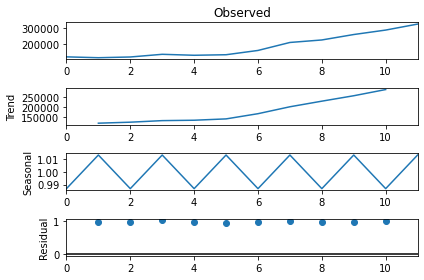

In [2499]:
crime_WB_df = crimes_total[crimes_total.STATE=='WEST BENGAL']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_WB_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

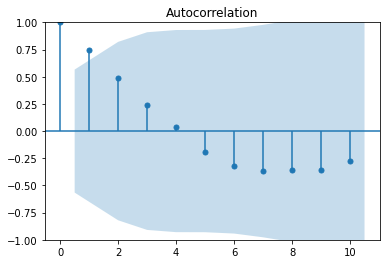

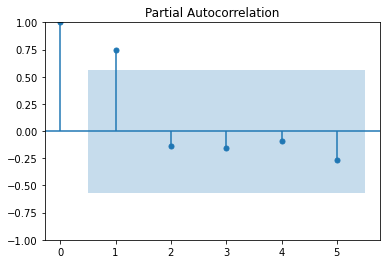

In [2500]:
crimes_WB_forecast = crime_WB_df.copy()
crimes_WB_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_WB_forecast = crimes_WB_forecast.reset_index(drop = True)
plot(crimes_WB_forecast)

In [2529]:
WB_arim = ARIMA(crimes_WB_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,1))
WB_moWB = WB_arim.fit()
WB_moWB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -89.742
Date:                Wed, 24 Nov 2021   AIC                            187.485
Time:                        00:50:21   BIC                            187.803
Sample:                             0   HQIC                           185.342
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4018      0.815      0.493      0.622      -1.195       1.999
ar.L2         -0.0465      0.577     -0.081      0.936      -1.177       1.084
ma.L1         -0.8792      1.363     -0.645      0.519      -3.551       1.792
sigma2       4.59e+08   3.59e-09   1.28e+17      0.000    4.59e+08    4.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.60   Prob(JB):                         0.82
Heteroskedasticity (H):               1.89   Skew:                            -0.09
Prob(H) (two-sided):                  0.62   Kurtosis:                         1.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+33. Standard errors may be unstable.
"""

In [2530]:
forecast_WB = WB_moWB.predict(10,12)
print('prediction',forecast_WB)
forecast_df_WB = WB_moWB.forecast(steps=10)
print('forecasting',forecast_df_WB)

prediction [286937.22046947 311616.38942249 335333.43455774]
forecasting [286937.22046947 311616.38942249 335333.43455774 358804.68395164
 382221.93670777 405628.92984316 429034.31303057 452439.52671263
 475844.74719939 499249.9783082 ]


In [2531]:
get_mape(crimes_WB_forecast.TOTAL[10:13],forecast_WB)


5.99

In [2532]:
i=12
for j in range(len(forecast_df_WB)):
    crimes_WB_forecast.loc[i] = crimes_WB_forecast.YEAR[i-1]+1
    crimes_WB_forecast.TOTAL[i] = forecast_df_WB[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_WB_forecast["YEAR"], y= crimes_WB_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_WB_forecast["YEAR"][13:], y= crimes_WB_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

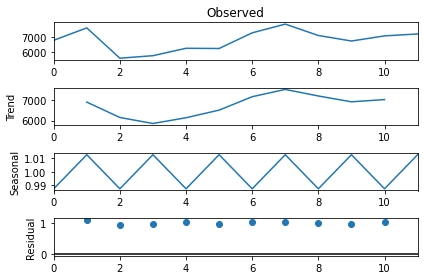

In [2533]:
crime_CHAN_df = crimes_total[crimes_total.STATE=='CHANDIGARH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_CHAN_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

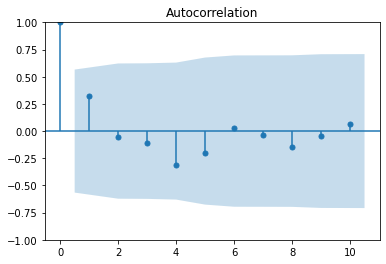

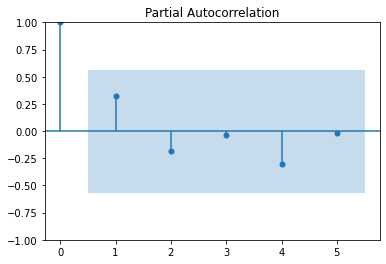

In [2534]:
crimes_CHAN_forecast = crime_CHAN_df.copy()
crimes_CHAN_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_CHAN_forecast = crimes_CHAN_forecast.reset_index(drop = True)
plot(crimes_CHAN_forecast)

In [2544]:
CHAN_arim = ARIMA(crimes_CHAN_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
CHAN_moCHAN = CHAN_arim.fit()
CHAN_moCHAN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -71.012
Date:                Wed, 24 Nov 2021   AIC                            148.023
Time:                        00:58:34   BIC                            148.615
Sample:                             0   HQIC                           146.746
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0009      0.279      0.003      0.998      -0.545       0.547
ar.L2         -0.5122      0.211     -2.428      0.015      -0.926      -0.099
sigma2      4.825e+05   2.97e+05      1.627      0.104   -9.87e+04    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.46   Prob(JB):                         0.78
Heteroskedasticity (H):               0.33   Skew:                             0.30
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2545]:
forecast_CHAN = CHAN_moCHAN.predict(10,12)
print('prediction',forecast_CHAN)
forecast_df_CHAN = CHAN_moCHAN.forecast(steps=10)
print('forecasting',forecast_df_CHAN)

prediction [7130.84094475 7317.60958012 7120.66512278]
forecasting [7130.84094475 7317.60958012 7120.66512278 7024.83446663 7125.62165065
 7174.79195985 7123.21379146 7097.98482929 7124.38006682 7137.32482101]


In [2546]:
get_mape(crimes_CHAN_forecast.TOTAL[10:13],forecast_CHAN)


3.11

In [2547]:
i=12
for j in range(len(forecast_df_CHAN)):
    crimes_CHAN_forecast.loc[i] = crimes_CHAN_forecast.YEAR[i-1]+1
    crimes_CHAN_forecast.TOTAL[i] = forecast_df_CHAN[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_CHAN_forecast["YEAR"], y= crimes_CHAN_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_CHAN_forecast["YEAR"][12:], y= crimes_CHAN_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

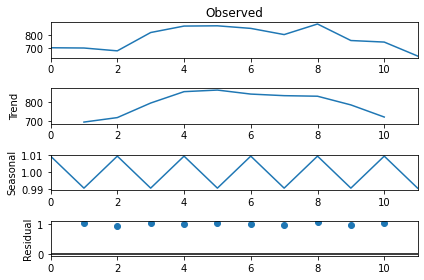

In [2548]:
crime_DNH_df = crimes_total[crimes_total.STATE=='D & N HAVELI']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DNH_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

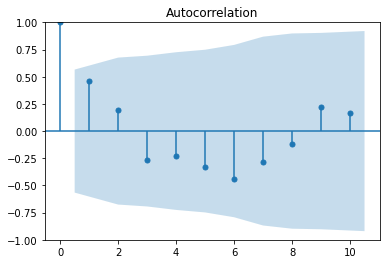

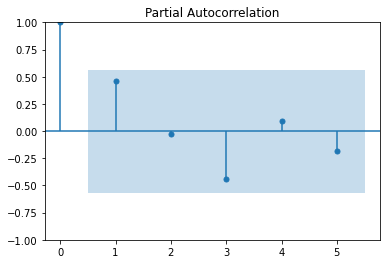

In [2549]:
crimes_DNH_forecast = crime_DNH_df.copy()
crimes_DNH_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_DNH_forecast = crimes_DNH_forecast.reset_index(drop = True)
plot(crimes_DNH_forecast)

In [2593]:
DNH_arim = ARIMA(crimes_DNH_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,2,1))
DNH_moDNH = DNH_arim.fit()
DNH_moDNH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 -47.109
Date:                Wed, 24 Nov 2021   AIC                            104.217
Time:                        01:04:21   BIC                            104.614
Sample:                             0   HQIC                           101.538
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5598      1.183     -0.473      0.636      -2.878       1.759
ar.L2         -0.3123      1.523     -0.205      0.838      -3.297       2.672
ar.L3         -0.2046      1.059     -0.193      0.847      -2.280       1.871
ma.L1         -0.3977      1.903     -0.209      0.834      -4.128       3.332
sigma2      6707.4221   7310.473      0.918      0.359   -7620.842     2.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.77   Prob(JB):                         0.80
Heteroskedasticity (H):               1.56   Skew:                             0.41
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2594]:
forecast_DNH = DNH_moDNH.predict(10,12)
print('prediction',forecast_DNH)
forecast_df_DNH = DNH_moDNH.forecast(steps=10)
print('forecasting',forecast_df_DNH)

prediction [761.25617569 730.89773738 721.82809886]
forecasting [761.25617569 730.89773738 721.82809886 684.69876347 663.91582149
 638.38915247 616.15425926 590.2135616  566.28996584 541.72097327]


In [2595]:
get_mape(crimes_DNH_forecast.TOTAL[10:13],forecast_DNH)

	

6.52

In [2596]:
i=12
for j in range(len(forecast_df_DNH)):
    crimes_DNH_forecast.loc[i] = crimes_DNH_forecast.YEAR[i-1]+1
    crimes_DNH_forecast.TOTAL[i] = forecast_df_DNH[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_DNH_forecast["YEAR"], y= crimes_DNH_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_DNH_forecast["YEAR"][12:], y= crimes_DNH_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

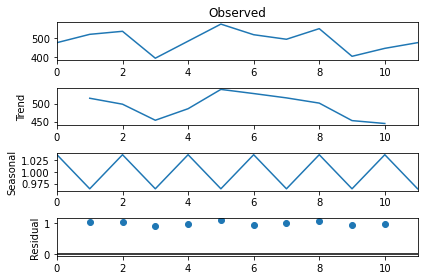

In [2597]:
crime_DD_df = crimes_total[crimes_total.STATE=='DAMAN & DIU']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DD_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

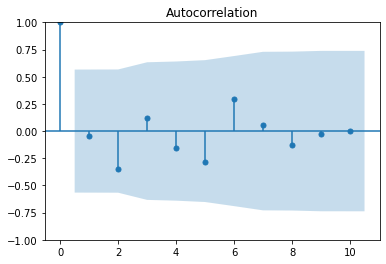

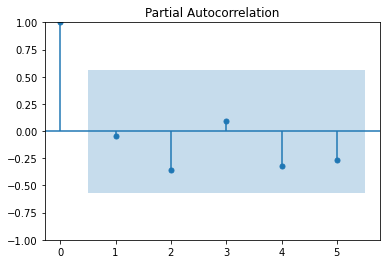

In [2598]:
crimes_DD_forecast = crime_DD_df.copy()
crimes_DD_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_DD_forecast = crimes_DD_forecast.reset_index(drop = True)
plot(crimes_DD_forecast)

In [2615]:
DD_arim = ARIMA(crimes_DD_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
DD_moDD = DD_arim.fit()
DD_moDD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -50.568
Date:                Wed, 24 Nov 2021   AIC                            107.136
Time:                        01:06:33   BIC                            107.728
Sample:                             0   HQIC                           105.860
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5893      0.520     -1.134      0.257      -1.608       0.429
ar.L2         -0.6064      0.368     -1.646      0.100      -1.328       0.116
sigma2      3937.2327   2506.372      1.571      0.116    -975.166    8849.631
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.94   Prob(JB):                         0.41
Heteroskedasticity (H):               1.25   Skew:                            -1.07
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2616]:
forecast_DD = DD_moDD.predict(10,12)
print('prediction',forecast_DD)
forecast_df_DD = DD_moDD.forecast(steps=10)
print('forecasting',forecast_df_DD)

prediction [458.07392096 515.92233243 450.25726908]
forecasting [458.07392096 515.92233243 450.25726908 453.87215238 491.56093332
 467.16039586 458.68441571 478.47530726 471.95310645 463.79530515]


In [2617]:
get_mape(crimes_DD_forecast.TOTAL[10:13],forecast_DD)


14.2

In [2618]:
i=12
for j in range(len(forecast_df_DD)):
    crimes_DD_forecast.loc[i] = crimes_DD_forecast.YEAR[i-1]+1
    crimes_DD_forecast.TOTAL[i] = forecast_df_DD[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_DD_forecast["YEAR"], y= crimes_DD_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_DD_forecast["YEAR"][12:], y= crimes_DD_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [2619]:
#DELHI

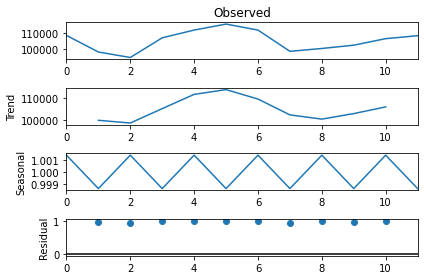

In [2620]:
crime_DEL_df = crimes_total[crimes_total.STATE=='DELHI UT']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DEL_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [2621]:
crimes_DEL_forecast = crime_DEL_df.copy()
crimes_DEL_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_DEL_forecast = crimes_DEL_forecast.reset_index(drop = True)
crimes_DEL_forecast

YEAR   TOTAL
0   2001  108768
1   2002   98274
2   2003   94808
3   2004  107246
4   2005  112130
5   2006  115926
6   2007  112130
7   2008   98700
8   2009  100502
9   2010  102584
10  2011  106706
11  2012  108574

In [2736]:
DEL_arim = ARIMA(crimes_DEL_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,2,0))
DEL_moDEL = DEL_arim.fit()
DEL_moDEL.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -84.471
Date:                Wed, 24 Nov 2021   AIC                            172.942
Time:                        01:17:52   BIC                            173.101
Sample:                             0   HQIC                           171.870
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0611      0.437     -0.140      0.889      -0.917       0.795
sigma2      9.838e+07   1.84e-10   5.33e+17      0.000    9.84e+07    9.84e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.47   Prob(JB):                         0.64
Heteroskedasticity (H):               1.02   Skew:                             0.66
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.76e+34. Standard errors may be unstable.
"""

In [2737]:
forecast_DEL = DEL_moDEL.predict(10,12)
print('prediction',forecast_DEL)
forecast_df_DEL = DEL_moDEL.forecast(steps=10)
print('forecasting',forecast_df_DEL)

prediction [104648.88108367 106714.80880055 108780.67252733]
forecasting [104648.88108367 106714.80880055 108780.67252733 110846.5401664
 112912.40756628 114978.27498078 117044.14239439 119110.00980805
 121175.87722171 123241.74463537]


In [2738]:
get_mape(crimes_DEL_forecast.TOTAL[10:13],forecast_DEL)

	

3.35

In [2739]:
i=12
for j in range(len(forecast_df_DEL)):
    crimes_DEL_forecast.loc[i] = crimes_DEL_forecast.YEAR[i-1]+1
    crimes_DEL_forecast.TOTAL[i] = forecast_df_DEL[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_DEL_forecast["YEAR"], y= crimes_DEL_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_DEL_forecast["YEAR"][12:], y= crimes_DEL_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

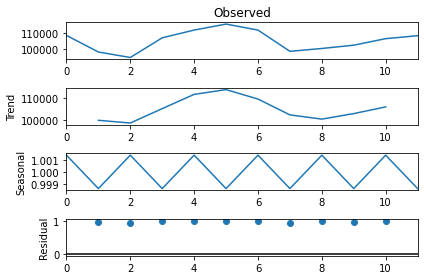

In [2740]:
crime_LAK_df = crimes_total[crimes_total.STATE=='LAKSHADWEEP']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DEL_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

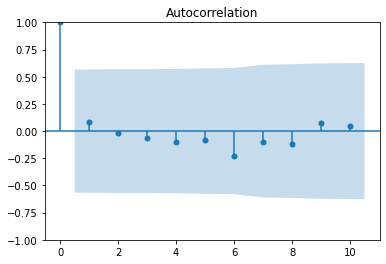

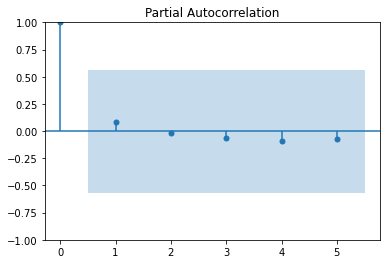

In [2741]:
crimes_LAK_forecast = crime_LAK_df.copy()
crimes_LAK_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_LAK_forecast = crimes_LAK_forecast.reset_index(drop = True)
plot(crimes_LAK_forecast)


In [2746]:
LAK_arim = ARIMA(crimes_LAK_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
LAK_moLAK = LAK_arim.fit()
LAK_moLAK.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -50.318
Date:                Wed, 24 Nov 2021   AIC                            106.636
Time:                        01:18:51   BIC                            107.227
Sample:                             0   HQIC                           105.359
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0057      0.374     -2.686      0.007      -1.740      -0.272
ar.L2         -0.4399      0.435     -1.012      0.312      -1.292       0.412
sigma2      3724.1250   2514.684      1.481      0.139   -1204.566    8652.816
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.19   Prob(JB):                         0.97
Heteroskedasticity (H):               8.58   Skew:                             0.20
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2747]:
forecast_LAK = LAK_moLAK.predict(10,12)
print('prediction',forecast_LAK)
forecast_df_LAK = LAK_moLAK.forecast(steps=10)
print('forecasting',forecast_df_LAK)

prediction [234.74319516 164.07998014 168.83353991]
forecasting [234.74319516 164.07998014 168.83353991 195.13918869 166.59116401
 183.73072368 179.05166531 176.21748867 181.12638733 177.43610524]


In [2748]:
get_mape(crimes_LAK_forecast.TOTAL[10:13],forecast_LAK)


79.16

In [2749]:
i=12
for j in range(len(forecast_df_LAK)):
    crimes_LAK_forecast.loc[i] = crimes_LAK_forecast.YEAR[i-1]+1
    crimes_LAK_forecast.TOTAL[i] = forecast_df_LAK[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_LAK_forecast["YEAR"], y= crimes_LAK_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_LAK_forecast["YEAR"][13:], y= crimes_LAK_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

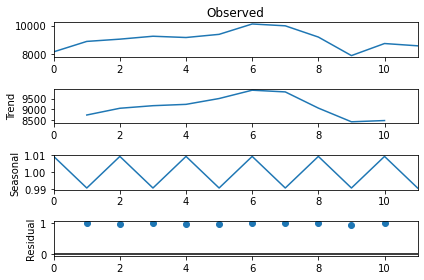

In [2750]:
crime_PUD_df = crimes_total[crimes_total.STATE=='PUDUCHERRY']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_PUD_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

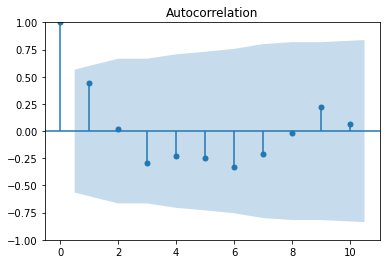

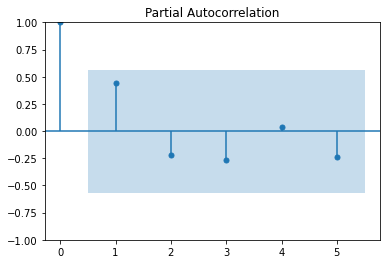

In [2751]:
crimes_PUD_forecast = crime_PUD_df.copy()
crimes_PUD_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_PUD_forecast = crimes_PUD_forecast.reset_index(drop = True)
plot(crimes_PUD_forecast)

In [2815]:
PUD_arim = ARIMA(crimes_PUD_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,0,0))
PUD_moPUD = PUD_arim.fit()
PUD_moPUD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -75.323
Date:                Wed, 24 Nov 2021   AIC                            158.647
Time:                        01:24:12   BIC                            159.857
Sample:                             0   HQIC                           157.319
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8886.8522    531.026     16.735      0.000    7846.061    9927.643
ar.L1          1.2630      1.282      0.985      0.325      -1.250       3.776
ar.L2         -0.7800      0.371     -2.104      0.035      -1.507      -0.053
sigma2      1.578e+05   1.91e+05      0.826      0.409   -2.17e+05    5.33e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.57
Prob(Q):                              1.00   Prob(JB):                         0.75
Heteroskedasticity (H):               0.79   Skew:                             0.49
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2816]:
forecast_PUD = PUD_moPUD.predict(10,12)
print('prediction',forecast_PUD)
forecast_df_PUD = PUD_moPUD.forecast(steps=10)
print('forecasting',forecast_df_PUD)


prediction [7372.30952851 7767.09694139 8653.93703023]
forecasting [7372.30952851 7767.09694139 8653.93703023 9466.1053064  9800.14864279
 9588.54857082 9060.72901012 8559.12651243 8337.29516294 8448.37498495]


In [2817]:
get_mape(crimes_PUD_forecast.TOTAL[10:13],forecast_PUD)


15.28

In [2818]:
i=12
for j in range(len(forecast_df_PUD)):
    crimes_PUD_forecast.loc[i] = crimes_PUD_forecast.YEAR[i-1]+1
    crimes_PUD_forecast.TOTAL[i] = forecast_df_PUD[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_PUD_forecast["YEAR"], y= crimes_PUD_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_PUD_forecast["YEAR"][13:], y= crimes_PUD_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [2907]:
#Crimes in UP
crimes_UP = crimes_df[crimes_df.STATE=="UTTAR PRADESH"]


In [2908]:
crimes_UP.columns

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\displayhook.py:275: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [2909]:
# Countplot for crime types
Dist_UP = crimes_UP[crimes_UP.DISTRICT=='TOTAL']
Dist_UP = crimes_UP.groupby(["YEAR"]).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()


In [2910]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [2911]:
crimes_theft = crimes_UP[crimes_UP.DISTRICT!="TOTAL"]
crimes_theft = crimes_theft.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'DEATH_BY_NEGLIGENCE':sum}).reset_index()
crimes_theft.head(5)

DISTRICT  TOTAL_THEFT  HURT  DEATH_BY_NEGLIGENCE
0            AGRA        41450  5381                 4605
1         ALIGARH        20786  3756                 3103
2       ALLAHABAD        18356  5073                 3812
3  AMBEDKAR NAGAR         2686  1911                  599
4         AURAIYA         2088  1526                 1490

In [2912]:
crimes_large = crimes_theft[(crimes_theft.TOTAL_THEFT>10000) & (crimes_theft.HURT>5000) & (crimes_theft.DEATH_BY_NEGLIGENCE>2000)].reset_index()

crimes_large

index      DISTRICT  TOTAL_THEFT  HURT  DEATH_BY_NEGLIGENCE
0      0          AGRA        41450  5381                 4605
1      2     ALLAHABAD        18356  5073                 3812
2     43  KANPUR NAGAR        27788  5567                 4043

In [2913]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crimes_large["DISTRICT"],
    y=crimes_large["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=crimes_large["DISTRICT"],
    y=crimes_large["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=crimes_large["DISTRICT"],
    y=crimes_large["DEATH_BY_NEGLIGENCE"],
    name='DEATH_BY_NEGLIGENCE',
    marker_color='blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [2914]:
crimes_up_clus = crimes_UP.copy()

In [2915]:
crimes_up_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [2916]:
crimes_up_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [2917]:
crimes_up_main = crimes_up_clus[crimes_up_clus.DISTRICT!="TOTAL"]


In [2918]:
crimes_up_df = crimes_up_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()
       

In [2919]:
scale = StandardScaler()
scale_new = scale.fit_transform(crimes_up_df[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

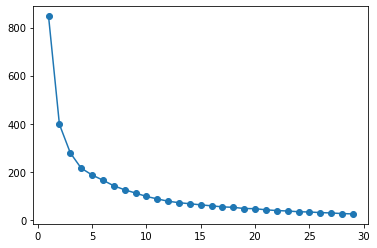

In [2920]:
cluster_range = range(1,30)
cluster_error = []

for x in cluster_range:
    cluster = KMeans(x)
    cluster.fit(scale_new)
    cluster_error.append(cluster.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_error, marker = "o")

In [2921]:
k = 3
cluster_new = KMeans(3, random_state = 42)
cluster_new.fit(scale_new)
crimes_up_df['Cluster_ID'] = cluster_new.labels_

In [2922]:
crimes_up_df[crimes_up_df.Cluster_ID == 0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
3    AMBEDKAR NAGAR         2686  1911         533                 919   
4           AURAIYA         2088  1526         584                 342   
7           BAGHPAT         4018  1111         530                 784   
8          BAHRAICH         3526  1965         765                 447   
9            BALLIA         3098  1926         350                 339   
10        BALRAMPUR         1124   722         260                 182   
11            BANDA         2440  1158         348                 391   
14            BASTI         2440  1542         301                 357   
15       BHIM NAGAR          950   152         207                 125   
18         CHANDOLI         1746  1297         182                 512   
19  CHITRAKOOT DHAM         1046   426         180                 130   
20        CSM NAGAR          658   599         283                 118   
21           DEORIA         2380  1608         373                 308   
23           ETAWAH         4340  1493         822                 714   
24         FAIZABAD         4592  2211         656                 432   
25        FATEHGARH         2862  1253         680                 587   
28           G.R.P.        47320   110          94                   1   
31         GHAZIPUR         2502  1695         244                 569   
32            GONDA         3702  2577         680                 134   
34         HAMIRPUR         1290   463         233                 190   
37        J.P.NAGAR         3436   877         469                 762   
38           JALAUN         2512   101         427                 419   
40           JHANSI         4716   987         454                 377   
41          KANNAUJ         1964   301         558                 822   
42     KANPUR DEHAT         2266  2238         475                 716   
44  KANSHIRAM NAGAR          920   469         255                 132   
45        KAUSHAMBI         1898  1388         383                 610   
47      KUSHI NAGAR         2142  2063         411                 251   
48         LALITPUR         1128   534         141                 237   
50      MAHARAJGANJ         1134   938         352                 282   
51           MAHOBA         1196   337         210                 152   
54              MAU         2756  1437         451                 535   
56         MIRZAPUR         2416  1401         144                 737   
59  PANCHSHIL NAGAR         1438    57         165                 128   
60         PILIBHIT         2900    75         678                1365   
61   PRABUDDH NAGAR          752    13         130                 138   
64    RAMABAI NAGAR          618   741         256                 230   
65           RAMPUR         6718   355         831                 539   
67  SANT KABIRNAGAR         1220  1333         310                 205   
69        SHRAWASTI         1174  1145         238                 104   
70    SIDHARTHNAGAR         1784   761         333                 301   
72        SONBHADRA         1692  1073         200                 190   
73  ST.RAVIDASNAGAR         1436   807          94                 221   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
3        508     430                  599       610    381   
4        292     484                 1490       332    279   
7        420     949                  943       588    598   
8        797     573                  913       975    555   
9        773     436                  821       482    744   
10       271     228                  321       378    146   
11       669     606                  515       562    443   
14       467     373                  986       581    420   
15       156     149                  179        79    135   
18       366     306                  443       518     92   
19       348     317                  517       192     93   
20       1

In [2923]:
crimes_up_df[crimes_up_df.Cluster_ID == 1]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
5           AZAMGARH         4164  3354         698                1016   
6             BADAUN         4690  3487        1007                 542   
12         BARABANKI         4974  2993         898                1142   
16            BIJNOR         5868  3313         955                2144   
17      BULANDSHAHAR         9220  2073        1317                2386   
22              ETAH         5994  3040         928                 907   
26          FATEHPUR         2500  2370         610                 537   
27         FIROZABAD         8658  3403        1361                1123   
29  GAUTAMBUDH NAGAR        37226   407         882                 882   
33         GORAKHPUR        13282  3778        1272                1535   
35            HARDOI         4560  3663         847                 821   
36           HATHRAS         5002  1764         713                1257   
39           JAUNPUR         3666  3581         582                 866   
46             KHIRI         6954  4333        1102                 884   
52          MAINPURI         4828  2380         845                 466   
53           MATHURA        13134  1785         905                1842   
57         MORADABAD        15392  1086        1586                2558   
58     MUZAFFARNAGAR        13290   261        1766                2546   
62        PRATAPGARH         3924  3558         723                 942   
63       RAIBAREILLY         4654  3099         640                1233   
66        SAHARANPUR         9292   385         670                1830   
68      SHAHJAHANPUR         5526  2381        1170                 438   
71           SITAPUR        10436  3155        1510                1200   
74         SULTANPUR         5206  3071         556                 767   
75             UNNAO         4486  2672         959                1061   
76          VARANASI        14726  2552         668                1408   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
5        982     967                 1135       861   1110   
6        686    1742                  658       637    329   
12       993     753                 1807       545    366   
16       653    1078                 1983      1683    613   
17       853    1974                 2882      1622   1035   
22       699    1477                 1660      1025   1071   
26       568     990                 2138       822    211   
27       755    1406                 1024      1063   1137   
29      1294     944                 2340      2415    943   
33      1887    1109                 3010      2140   1645   
35       596    1151                 2218       754    378   
36       641     759                 1179       765    948   
39       737     557                 1585      1090    684   
46       793    1255                 1528       879    664   
52       604    1229                 1153       816    752   
53       903    1186                 4014      2375   1323   
57      1474    1818                 2161      1799    957   
58      1147    2483                 1721      1885   1594   
62      1007     673                 1195       800   1103   
63       806     714                 1691       707    604   
66       712     947                 1487      2208    934   
68       705    1563                 2122      1050    442   
71      1356    1445                 2288      1017    770   
74      1080     711                 1636       594    529   
75       692    1079                 2073       714    658   
76      1412     751                 1673      2022    924   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_ID  
5                     251              6694           1  
6                     495             11356           1  
12                    394              9715           1  
16                    442              7214           1  
17                   

In [2924]:
crimes_up_df[crimes_up_df.Cluster_ID == 2]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
0           AGRA        41450  5381        2541                4003      3063   
1        ALIGARH        20786  3756        2134                2754      1875   
2      ALLAHABAD        18356  5073        1425                2316      2861   
13      BAREILLY        14046  4640        1754                2570      1662   
30     GHAZIABAD        47876   731        2340                2922      2237   
43  KANPUR NAGAR        27788  5567        2636                4341      2849   
49       LUCKNOW        57632   793        2914                5598      6663   
55        MEERUT        31484   689        2082                3746      2255   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
0     1609                 4605      3323   3279                   1278   
1     2032                 3103      2768   2823                    994   
2     1652                 3812      2385   1847                    665   
13    2070                 2630      2518   1290                   1075   
30    2227                 4719      3665   1299                    534   
43    1961                 4043      4427   1945                   1083   
49    1828                 5058      7731   2909                   1402   
55    2398                 3279      3072   1963                    831   

    OTHER IPC CRIMES  Cluster_ID  
0              20143           2  
1              13804           2  
2              20104           2  
13             19471           2  
30             19741           2  
43             22257           2  
49             43505           2  
55             17894           2

In [2925]:
#crimes in Delhi
crimes_DEL = crimes_df[crimes_df.STATE=="DELHI UT"]
crimes_DEL.shape

(183, 34)

In [2926]:
crimes_DEL.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [2927]:
Dist_DEL = crimes_DEL[crimes_DEL.DISTRICT=='TOTAL']


In [2928]:
Dist_DEL = crimes_DEL.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [2929]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_UP["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [2930]:
crimes_all = crimes_DEL[crimes_DEL.DISTRICT!="TOTAL"]
crimes_all = crimes_all.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'CRUELTY_BY_HUSBAND':sum}).reset_index()


In [2931]:
crimes_del = crimes_all[(crimes_all.TOTAL_THEFT>10000) & (crimes_all.CRUELTY_BY_HUSBAND>1000)].reset_index()
crimes_del

index    DISTRICT  TOTAL_THEFT  CRUELTY_BY_HUSBAND
0      3        EAST        58330                1860
1      9  NORTH EAST        37866                1947
2     10  NORTH WEST        55120                2180
3     11       OUTER        23250                1107
4     13       SOUTH        74934                1443
5     15  SOUTH WEST        35614                1498
6     17        WEST        54066                2387

In [2932]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crimes_del["DISTRICT"],
    y=crimes_del["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=crimes_del["DISTRICT"],
    y=crimes_del["CRUELTY_BY_HUSBAND"],
    name='CRUELTY BY HUSBAND',
    marker_color='Purple'
))

In [2933]:
crimes_del_clus = crimes_DEL.copy()
crimes_del_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [2934]:
crimes_del_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [2935]:
crimes_del_main = crimes_del_clus[crimes_del_clus.DISTRICT!="TOTAL"]


In [2936]:
crimes_del_df = crimes_del_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()
    
       

In [2937]:
scaled = StandardScaler()
scaled_new = scaled.fit_transform(crimes_del_df[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [2938]:
new_range = range(1,20)
rate_error = []
for i in new_range:
    cluster_df = KMeans(i)
    cluster_df.fit(scaled_new)
    rate_error.append(cluster_df.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_range, rate_error, marker="o")

ValueError: n_samples=18 should be >= n_clusters=19.

In [ ]:
k = 2
clusterdel = KMeans(2, random_state=42)
clusterdel.fit(scaled_new)
crimes_del_df['cluster_id'] = clusterdel.labels_

In [ ]:
crimes_del_df[crimes_del_df.cluster_id == 0]

In [ ]:
crimes_del_df[crimes_del_df.cluster_id == 1]

In [ ]:
#Crimes in west bengal

In [ ]:
crimes_WB = crimes_df[crimes_df.STATE=="WEST BENGAL"]
crimes_WB.shape

In [ ]:
crimes_WB.columns

In [ ]:
DIST_WB = crimes_WB[crimes_WB.DISTRICT=='TOTAL']

In [ ]:
DIST_WB = crimes_WB.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_wb_df = crimes_WB[crimes_WB.DISTRICT!="TOTAL"]
crimes_wb_df = crimes_wb_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'CRUELTY_BY_HUSBAND':sum, 'HURT':sum}).reset_index()


In [ ]:
crimes_wb_df

In [ ]:
wb_crimes = crimes_wb_df[(crimes_wb_df.TOTAL_THEFT>10000) & (crimes_wb_df.CRUELTY_BY_HUSBAND>5000) & (crimes_wb_df.HURT>2000)].reset_index()
wb_crimes

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=wb_crimes["DISTRICT"],
    y=wb_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=wb_crimes["DISTRICT"],
    y=wb_crimes["CRUELTY_BY_HUSBAND"],
    name='BURGLARY',
    marker_color='PINK'
))
fig.add_trace(go.Bar(
    x=wb_crimes["DISTRICT"],
    y=wb_crimes["HURT"],
    name='CHEATING',
    marker_color='Blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_wb_clus = crimes_WB.copy()
crimes_wb_clus.columns

In [ ]:
crimes_wb_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [ ]:
crimes_wb_main = crimes_wb_clus[crimes_wb_clus.DISTRICT!="TOTAL"]

In [ ]:
crimes_KMe_wb = crimes_wb_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_wb = scaled.fit_transform(crimes_KMe_wb[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new = range(1,20)
rate = []
for i in new:
    clustering = KMeans(i)
    clustering.fit(scaled_wb)
    rate.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new, rate, marker="o")

In [ ]:
k = 3
wb_clus = KMeans(3, random_state=42)
wb_clus.fit(scaled_wb)
crimes_KMe_wb['cluster_id'] = wb_clus.labels_

In [ ]:
crimes_KMe_wb[crimes_KMe_wb.cluster_id==0] 

In [ ]:
crimes_KMe_wb[crimes_KMe_wb.cluster_id==1] 

In [ ]:
crimes_KMe_wb[crimes_KMe_wb.cluster_id==2] 

In [ ]:
#Crimes In MAHARASHTRA

crimes_MH = crimes_df[crimes_df.STATE=="MAHARASHTRA"]
crimes_MH.shape

In [ ]:
DIST_MH = crimes_MH[crimes_MH.DISTRICT=='TOTAL']

In [ ]:
DIST_MH = crimes_MH.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()
    

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_mh_df = crimes_MH[crimes_MH.DISTRICT!="TOTAL"]
crimes_mh_df = crimes_mh_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'BURGLARY':sum}).reset_index()


In [ ]:
mh_crimes = crimes_mh_df[(crimes_mh_df.TOTAL_THEFT>10000) & (crimes_mh_df.HURT>10000) & (crimes_mh_df.BURGLARY>5000)].reset_index()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=mh_crimes["DISTRICT"],
    y=mh_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=mh_crimes["DISTRICT"],
    y=mh_crimes["HURT"],
    name='HURT',
    marker_color='Blue'
))
fig.add_trace(go.Bar(
    x=mh_crimes["DISTRICT"],
    y=mh_crimes["BURGLARY"],
    name='BURGLARY',
    marker_color='yellow'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_mh_clus = crimes_MH.copy()
crimes_mh_clus.columns

In [ ]:
crimes_mh_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [ ]:
crimes_mh_main = crimes_mh_clus[crimes_mh_clus.DISTRICT!="TOTAL"]

In [ ]:
crimes_KMe_mh = crimes_mh_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_mh = scaled.fit_transform(crimes_KMe_mh[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_mh = range(1,20)
rate_mh = []
for i in new_mh:
    clustering = KMeans(i)
    clustering.fit(scaled_mh)
    rate_mh.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_mh, rate_mh, marker="o")

In [ ]:
k = 4
mh_clus = KMeans(4, random_state=42)
mh_clus.fit(scaled_mh)
crimes_KMe_mh['cluster_id'] = mh_clus.labels_

In [ ]:
crimes_KMe_mh[crimes_KMe_mh.cluster_id==0]

In [ ]:
crimes_KMe_mh[crimes_KMe_mh.cluster_id==1]

In [ ]:
crimes_KMe_mh[crimes_KMe_mh.cluster_id==2]

In [ ]:
crimes_KMe_mh[crimes_KMe_mh.cluster_id==3]

In [1816]:
#Crimes in Tamil Nadu
crimes_TN = crimes_df[crimes_df.STATE=='TAMIL NADU']

In [1817]:
DIST_TN = crimes_TN[crimes_TN.DISTRICT=='TOTAL']

In [1818]:
DIST_TN = crimes_TN.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()
    

In [1819]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [1820]:
crimes_TN_df = crimes_TN[crimes_TN.DISTRICT!="TOTAL"]
crimes_TN_df = crimes_TN_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'DEATH_BY_NEGLIGENCE': sum}).reset_index()


In [1821]:
TN_crimes = crimes_TN_df[(crimes_TN_df.TOTAL_THEFT>10000) & (crimes_TN_df.HURT>5000) & (crimes_TN_df.DEATH_BY_NEGLIGENCE>5000)].reset_index()


In [1822]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=TN_crimes["DISTRICT"],
    y=TN_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=TN_crimes["DISTRICT"],
    y=TN_crimes["HURT"],
    name='HURT',
    marker_color='Blue'
))
fig.add_trace(go.Bar(
    x=TN_crimes["DISTRICT"],
    y=TN_crimes["DEATH_BY_NEGLIGENCE"],
    name='DEATH_BY_NEGLIGENCE',
    marker_color='Orange'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [1823]:
crimes_tn_clus = crimes_TN.copy()
crimes_tn_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [1824]:
crimes_tn_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [1825]:
crimes_tn_main = crimes_tn_clus[crimes_tn_clus.DISTRICT!="TOTAL"]

In [1826]:
crimes_KMe_tn = crimes_tn_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [1827]:
scaled = StandardScaler()
scaled_tn = scaled.fit_transform(crimes_KMe_tn[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

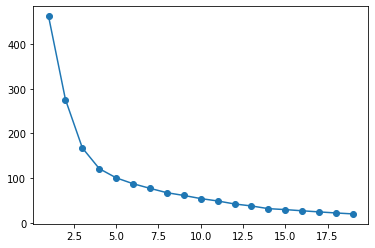

In [1828]:
new_tn = range(1,20)
rate_tn = []
for i in new_tn:
    clustering = KMeans(i)
    clustering.fit(scaled_tn)
    rate_tn.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_tn, rate_tn, marker="o")

In [1829]:
k = 3
tn_clus = KMeans(3, random_state=42)
tn_clus.fit(scaled_tn)
crimes_KMe_tn['cluster_id'] = tn_clus.labels_

In [1830]:
crimes_KMe_tn[crimes_KMe_tn.cluster_id==0] 

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
5     COIMBATORE RURAL        21346  13866         524                 973   
7            CUDDALORE        10848  10813         630                 470   
8           DHARMAPURI         5350  11529         538                 466   
9             DINDIGUL         9470   5556         554                 764   
10               ERODE        13484  15755         507                 432   
11         KANCHIPURAM         9800   5184         199                 181   
15       MADURAI RURAL         8570  11095         570                 760   
23         SALEM RURAL         5656  21864         985                 993   
26           THANJAVUR        13906   9150         537                 291   
28  THIRUNELVELI RURAL        10420  11797         602                 936   
33         THOOTHUGUDI        10758   7145         399                 586   
38             VELLORE        13642  14838         609                 484   
39          VILLUPURAM         8756   8886         952                 671   
41        VIRUDHUNAGAR         9580   6084         477                 662   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
5       2861     816                 8862      1139   2580   
7       1382     720                 4918       269   2168   
8       1022     665                 3147       421   2334   
9       1217     721                 4872       906    749   
10      1707     642                 6411       934    499   
11      1568     690                 7024       454   1068   
15      1511     690                 4522      1407   1927   
23      1043     806                 5103       575   2545   
26      2111     724                 4211       471   1274   
28      2190     933                 3688      1013    133   
33      2053     828                 3155      1063    472   
38      2318     871                 6343       760    999   
39      1400     826                 7478       640   3711   
41      1440     580                 2901      1122    935   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
5                     912             53511           0  
7                     619             57162           0  
8                     753             23096           0  
9                     455             37766           0  
10                    635             40565           0  
11                    385             52554           0  
15                    752             29960           0  
23                   1692             29704           0  
26                    931             36833           0  
28                   1222             51712           0  
33                    340             35537           0  
38                    461             52065           0  
39                   1222             49783           0  
41                    498             33457           0

In [1831]:
crimes_KMe_tn[crimes_KMe_tn.cluster_id==1] 

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0             ARIYALUR         1034   1544         136                  53   
1              CHENGAI         8602   3442         114                 319   
3         CHENNAI RLY.         4530    348           8                   8   
4      CHENNAISUBURBAN         4304   1874          87                 157   
6     COIMBATORE URBAN        21568   2583         172                 570   
12         KANYAKUMARI         7248   7242         313                 719   
13               KARUR         5628   2953         278                 209   
14         KRISHNAGIRI         5110   5892         377                 247   
16       MADURAI URBAN        12470   1979         319                 587   
17        NAGAPATTINAM         5746   9575         354                 164   
18            NAMAKKAL         5222  10465         417                 285   
19            NILGIRIS         2440   2561          64                  93   
20          PERAMBALUR         3618   4537         277                 213   
21          PUDUKOTTAI         5116   3512         377                 370   
22       RAMNATHAPURAM         4640   5515         384                 205   
24         SALEM URBAN         7026   2967         261                 313   
25          SIVAGANGAI         5850   4049         333                 471   
27               THENI         6010   7300         440                 534   
29  THIRUNELVELI URBAN         4328   1176         148                 131   
30         THIRUVALLUR         4604   7392         226                 268   
31     THIRUVANNAMALAI         7060   8613         458                 284   
32          THIRUVARUR         4386   8384         229                 132   
34            TIRUPPUR         6172   2013         225                 257   
35         TRICHY RLY.         1488    172           1                   4   
36        TRICHY RURAL         4760   6555         351                 324   
37        TRICHY URBAN        10404   2301         195                 331   
40          VILUPPURAM          612    468          49                  59   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0        192     138                  531        65    242   
1       1855     308                 2303       464    417   
3         18      29                   51        60    105   
4        903     232                 1759       524    213   
6       1773     261                 2941      1249    795   
12      2110     422                 3113      1113     38   
13       532     282                 2768       195    273   
14       811     521                 3689       509   1364   
16      1156     347                 1377      2054    554   
17       827     521                 2096       338    568   
18       690     420                 4222       510    753   
19       894     173                  458       152    248   
20       562     292                 1738       355    534   
21       802     402                 2719       339   1202   
22       914     433                 1903       518   1226   
24       557     242                 1467       604    303   
25      1099     375                 2160       619    501   
27      1104     364                 2183      1181    849   
29       511     199                  884       415    150   
30       941     375                 3059       357   1133   
31      1130     478                 3324       603   1800   
32       891     307                 1719       241    577   
34       993     228                 2882       534    234   
35        18      11                   48        16     27   
36       783     594                 5593       266    527   
37       805     228                 1570       782     95   
40       102      68                  567        21    250   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
0                     241         

In [1832]:
crimes_KMe_tn[crimes_KMe_tn.cluster_id==2] 

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
2  CHENNAI        58758  11699         627                2212      6543   

   MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
2    1365                10434      6431    996                    849   

   OTHER IPC CRIMES  cluster_id  
2             86221           2

In [ ]:
#Crimes in Bihar
crimes_BI = crimes_df[crimes_df.STATE=='BIHAR']
crimes_BI.shape

In [ ]:
DIST_BI = crimes_BI[crimes_BI.DISTRICT=='TOTAL']

In [ ]:
DIST_BI = crimes_BI.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()
                                           
    

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_BI_df = crimes_BI[crimes_BI.DISTRICT!="TOTAL"]
crimes_BI_df = crimes_BI_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'RIOTS':sum}).reset_index()


In [ ]:
BI_crimes = crimes_BI_df[(crimes_BI_df.TOTAL_THEFT>10000) & (crimes_BI_df.RIOTS>1000) & (crimes_BI_df.HURT>5000)].reset_index()


In [ ]:
BI_crimes

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=BI_crimes["DISTRICT"],
    y=BI_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=BI_crimes["DISTRICT"],
    y=BI_crimes["RIOTS"],
    name='RIOTS',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=BI_crimes["DISTRICT"],
    y=BI_crimes["HURT"],
    name='HURT',
    marker_color='yellow'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_BI_clus = crimes_BI.copy()
crimes_BI_clus.columns

In [ ]:
crimes_BI_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [ ]:
crimes_BI_main = crimes_BI_clus[crimes_BI_clus.DISTRICT!="TOTAL"]

In [ ]:
crimes_KMe_BI = crimes_BI_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_BI = scaled.fit_transform(crimes_KMe_BI[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_BI = range(1,20)
rate_BI = []
for i in new_tn:
    clustering = KMeans(i)
    clustering.fit(scaled_BI)
    rate_BI.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_BI, rate_BI, marker="o")

In [ ]:
cluster_bi = KMeans(3, random_state = 42)
cluster_bi.fit(scaled_BI)
crimes_KMe_BI["clu_Id"] = cluster_bi.labels_

In [ ]:
crimes_KMe_BI[crimes_KMe_BI.clu_Id==0]

In [ ]:
crimes_KMe_BI[crimes_KMe_BI.clu_Id==1]

In [ ]:
crimes_KMe_BI[crimes_KMe_BI.clu_Id==2]

In [ ]:
#Crimes in Madhya Pradesh
crimes_MP = crimes_df[crimes_df.STATE=='MADHYA PRADESH']

In [ ]:
DIST_MP = crimes_MP[crimes_MP.DISTRICT=='TOTAL']

In [ ]:
DIST_MP = crimes_MP.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()
    

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_MP_df = crimes_MP[crimes_MP.DISTRICT!="TOTAL"]
crimes_MP_df = crimes_MP_df.groupby('DISTRICT').agg({"THEFT":sum, 'BURGLARY':sum, 'HURT':sum}).reset_index()


In [ ]:
MP_crimes = crimes_MP_df[(crimes_MP_df.THEFT>10000) & (crimes_MP_df.BURGLARY>5000) & (crimes_MP_df.HURT>5000)].reset_index()
MP_crimes

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=MP_crimes["DISTRICT"],
    y=MP_crimes["THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=MP_crimes["DISTRICT"],
    y=MP_crimes["BURGLARY"],
    name='BURGLARY',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=MP_crimes["DISTRICT"],
    y=MP_crimes["HURT"],
    name='HURT',
    marker_color='YELLOW'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_MP_clus = crimes_MP.copy()
crimes_MP_clus.columns

In [ ]:
crimes_MP_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [ ]:
crimes_MP_main = crimes_MP_clus[crimes_MP_clus.DISTRICT!="TOTAL"]

In [ ]:
crimes_KMe_MP = crimes_MP_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_MP = scaled.fit_transform(crimes_KMe_MP[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_MP = range(1,20)
rate_MP = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_MP)
    rate_MP.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_MP, rate_MP, marker="o")

In [ ]:
cluster_mp = KMeans(4, random_state = 42)
cluster_mp.fit(scaled_MP)
crimes_KMe_MP["clu_Id"] = cluster_mp.labels_

In [ ]:
crimes_KMe_MP[crimes_KMe_MP.clu_Id==0]

In [ ]:
crimes_KMe_MP[crimes_KMe_MP.clu_Id==1]

In [ ]:
crimes_KMe_MP[crimes_KMe_MP.clu_Id==2]

In [ ]:
crimes_KMe_MP[crimes_KMe_MP.clu_Id==3]

In [ ]:
crimes_ANP = crimes_df[crimes_df.STATE=='ANDHRA PRADESH']
crimes_ANP.shape

In [ ]:
DIST_ANP = crimes_ANP[crimes_ANP.DISTRICT=='TOTAL']

In [ ]:
DIST_ANP = crimes_ANP.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_ANP_df = crimes_ANP[crimes_ANP.DISTRICT!="TOTAL"]
crimes_ANP_df = crimes_ANP_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum}).reset_index()


In [ ]:
ANP_crimes = crimes_ANP_df[(crimes_ANP_df.TOTAL_THEFT>10000) & (crimes_ANP_df.HURT>10000)].reset_index()
ANP_crimes

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ANP_crimes["DISTRICT"],
    y=ANP_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=ANP_crimes["DISTRICT"],
    y=ANP_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_ANP_clus = crimes_ANP.copy()


In [ ]:
crimes_ANP_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [ ]:
crimes_ANP_main = crimes_ANP_clus[crimes_ANP_clus.DISTRICT!="TOTAL"]

In [ ]:
crimes_KMe_ANP = crimes_ANP_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_ANP = scaled.fit_transform(crimes_KMe_ANP[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_ANP = range(1,20)
rate_ANP = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_ANP)
    rate_ANP.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_ANP, rate_ANP, marker="o")

In [ ]:
cluster_anp = KMeans(3, random_state = 42)
cluster_anp.fit(scaled_ANP)
crimes_KMe_ANP["clu_Id"] = cluster_anp.labels_

In [ ]:
crimes_KMe_ANP[crimes_KMe_ANP.clu_Id==0]

In [ ]:
crimes_KMe_ANP[crimes_KMe_ANP.clu_Id==1]

In [ ]:
crimes_KMe_ANP[crimes_KMe_ANP.clu_Id==2]

In [ ]:
crimes_KER = crimes_df[crimes_df.STATE=='KERALA']
crimes_KER.shape

In [ ]:
crimes_KER.columns

In [ ]:
DIST_KER = crimes_KER[crimes_KER.DISTRICT=='TOTAL']

In [ ]:
DIST_KER= crimes_KER.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_KER_df = crimes_KER[crimes_KER.DISTRICT!="TOTAL"]
crimes_KER_df = crimes_KER_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'RIOTS':sum}).reset_index()
crimes_KER_df

In [ ]:
KER_crimes = crimes_KER_df[(crimes_KER_df.TOTAL_THEFT>2000) & (crimes_KER_df.HURT>10000) & (crimes_KER_df.RIOTS>2000)].reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=KER_crimes["DISTRICT"],
    y=KER_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=KER_crimes["DISTRICT"],
    y=KER_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=KER_crimes["DISTRICT"],
    y=KER_crimes["RIOTS"],
    name='RIOTS',
    marker_color='YEllow'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_KER_clus = crimes_KER.copy()


In [ ]:
crimes_KER_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [ ]:
crimes_KER_main = crimes_KER_clus[crimes_KER_clus.DISTRICT!="TOTAL"]

In [ ]:
crimes_KMe_KER = crimes_KER_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_KER = scaled.fit_transform(crimes_KMe_KER[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_KER = range(1,20)
rate_KER = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_KER)
    rate_KER.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_KER, rate_KER, marker="o")

In [ ]:
K=4
cluster_ker = KMeans(4, random_state = 42)
cluster_ker.fit(scaled_KER)
crimes_KMe_KER['Cluster_id'] = cluster_ker.labels_

In [ ]:
crimes_KMe_KER[crimes_KMe_KER.Cluster_id==0]

In [ ]:
crimes_KMe_KER[crimes_KMe_KER.Cluster_id==1]

In [ ]:
crimes_KMe_KER[crimes_KMe_KER.Cluster_id==2]

In [ ]:
crimes_KMe_KER[crimes_KMe_KER.Cluster_id==3]

In [ ]:
crimes_GUJ = crimes_df[crimes_df.STATE=='GUJARAT']
crimes_GUJ.shape

In [ ]:
DIST_GUJ = crimes_GUJ[crimes_GUJ.DISTRICT=='TOTAL']
DIST_GUJ= crimes_GUJ.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_GUJ_df = crimes_GUJ[crimes_GUJ.DISTRICT!="TOTAL"]
crimes_GUJ_df = crimes_GUJ_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum}).reset_index()
crimes_GUJ_df

In [ ]:
GUJ_crimes = crimes_GUJ_df[(crimes_GUJ_df.TOTAL_THEFT>2000) & (crimes_GUJ_df.HURT>5000)].reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=GUJ_crimes["DISTRICT"],
    y=GUJ_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=GUJ_crimes["DISTRICT"],
    y=GUJ_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))



fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_GUJ_clus = crimes_GUJ.copy()

In [ ]:
crimes_GUJ_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [ ]:
crimes_GUJ_main = crimes_GUJ_clus[crimes_GUJ_clus.DISTRICT!="TOTAL"]

In [ ]:
crimes_KMe_Guj = crimes_GUJ_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_GUJ = scaled.fit_transform(crimes_KMe_Guj[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_Guj = range(1,20)
rate_Guj = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_GUJ)
    rate_Guj.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_Guj, rate_Guj, marker="o")

In [ ]:
K=4
cluster_guj = KMeans(4, random_state = 42)
cluster_guj.fit(scaled_GUJ)
crimes_KMe_Guj['Cluster_id'] = cluster_guj.labels_

In [ ]:
crimes_KMe_Guj[crimes_KMe_Guj.Cluster_id==0]

In [ ]:
crimes_KMe_Guj[crimes_KMe_Guj.Cluster_id==1]

In [ ]:
crimes_KMe_Guj[crimes_KMe_Guj.Cluster_id==2]

In [ ]:
crimes_KMe_Guj[crimes_KMe_Guj.Cluster_id==3]

In [ ]:
crimes_AS = crimes_df[crimes_df.STATE=='ASSAM']
crimes_AS.shape

In [ ]:
DIST_AS = crimes_AS[crimes_AS.DISTRICT=='TOTAL']
DIST_AS = crimes_AS.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()


In [ ]:
crimes_AS_df = crimes_AS[crimes_AS.DISTRICT!="TOTAL"]
crimes_AS_df = crimes_AS_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'CRUELTY_BY_HUSBAND':sum}).reset_index()
crimes_AS_df

In [ ]:
AS_crimes = crimes_AS_df[(crimes_AS_df.TOTAL_THEFT>10000) & (crimes_AS_df.HURT>5000) & (crimes_AS_df.CRUELTY_BY_HUSBAND>2000)].reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=AS_crimes["DISTRICT"],
    y=AS_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=AS_crimes["DISTRICT"],
    y=AS_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=AS_crimes["DISTRICT"],
    y=AS_crimes["CRUELTY_BY_HUSBAND"],
    name='CRUELTY BY HUSBAND',
    marker_color='Purple'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_AS_clus = crimes_AS.copy()

In [ ]:
crimes_AS_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)


In [ ]:
crimes_AS_main = crimes_AS_clus[crimes_AS_clus.DISTRICT!="TOTAL"]
crimes_KMe_AS = crimes_AS_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()


In [ ]:
scaled = StandardScaler()
scaled_AS = scaled.fit_transform(crimes_KMe_AS[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])


In [ ]:
new_AS = range(1,20)
rate_AS = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_AS)
    rate_AS.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_AS, rate_AS, marker="o")

In [ ]:
K=4
cluster_AS = KMeans(4, random_state = 42)
cluster_AS.fit(scaled_AS)
crimes_KMe_AS['Cluster_id'] = cluster_AS.labels_

In [ ]:
crimes_KMe_AS[crimes_KMe_AS.Cluster_id==0]

In [ ]:
crimes_KMe_AS[crimes_KMe_AS.Cluster_id==1]

In [ ]:
crimes_KMe_AS[crimes_KMe_AS.Cluster_id==2]

In [ ]:
crimes_KMe_AS[crimes_KMe_AS.Cluster_id==3]

In [ ]:
#crimes in Rajastan
crimes_RAJ = crimes_df[crimes_df.STATE=='RAJASTHAN']
crimes_RAJ.shape

In [ ]:
DIST_RAJ = crimes_RAJ[crimes_RAJ.DISTRICT=='TOTAL']
DIST_RAJ= crimes_RAJ.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_RAJ_df = crimes_RAJ[crimes_RAJ.DISTRICT!="TOTAL"]
crimes_RAJ_df = crimes_RAJ_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'CHEATING':sum}).reset_index()

In [ ]:
RAJ_crimes = crimes_RAJ_df[(crimes_RAJ_df.TOTAL_THEFT>10000) & (crimes_RAJ_df.HURT>5000) & (crimes_RAJ_df.CHEATING>2000)].reset_index()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=RAJ_crimes["DISTRICT"],
    y=RAJ_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=RAJ_crimes["DISTRICT"],
    y=RAJ_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=RAJ_crimes["DISTRICT"],
    y=RAJ_crimes["CHEATING"],
    name='CHEATING',
    marker_color='yellow'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_RAJ_clus = crimes_RAJ.copy()
crimes_RAJ_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [ ]:
crimes_RAJ_main = crimes_RAJ_clus[crimes_RAJ_clus.DISTRICT!="TOTAL"]
crimes_KMe_RAJ = crimes_RAJ_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()


In [ ]:
scaled = StandardScaler()
scaled_RAJ = scaled.fit_transform(crimes_KMe_RAJ[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_RAJ = range(1,20)
rate_RAJ = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_RAJ)
    rate_RAJ.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_RAJ, rate_RAJ, marker="o")

In [ ]:
K=3
cluster_raj = KMeans(3, random_state = 42)
cluster_raj.fit(scaled_RAJ)
crimes_KMe_RAJ['Cluster_id'] = cluster_raj.labels_


In [ ]:
crimes_KMe_RAJ[crimes_KMe_RAJ.Cluster_id==0]

In [ ]:
crimes_KMe_RAJ[crimes_KMe_RAJ.Cluster_id==1]

In [ ]:
crimes_KMe_RAJ[crimes_KMe_RAJ.Cluster_id==2]

In [ ]:
crimes_HAR = crimes_df[crimes_df.STATE=='HARYANA']
crimes_HAR.shape
DIST_HAR = crimes_HAR[crimes_HAR.DISTRICT=='TOTAL']
DIST_HAR= crimes_HAR.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()


In [ ]:
  fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_HAR_df = crimes_HAR[crimes_HAR.DISTRICT!="TOTAL"]
crimes_HAR_df = crimes_HAR_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum}).reset_index()
crimes_HAR_df

In [ ]:
HAR_crimes = crimes_HAR_df[(crimes_HAR_df.TOTAL_THEFT>10000)].reset_index()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=HAR_crimes["DISTRICT"],
    y=HAR_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_HAR_clus = crimes_HAR.copy()
crimes_HAR_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)


In [ ]:
crimes_HAR_main = crimes_HAR_clus[crimes_HAR_clus.DISTRICT!="TOTAL"]
crimes_KMe_Har = crimes_HAR_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_HAR = scaled.fit_transform(crimes_KMe_Har[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_Har = range(1,20)
rate_har = []
for i in new_Har:
    clustering = KMeans(i)
    clustering.fit(scaled_HAR)
    rate_har.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_Har, rate_har, marker="o")

In [ ]:
K=2
cluster_guj = KMeans(2, random_state = 42)
cluster_guj.fit(scaled_HAR)
crimes_KMe_Har['Cluster_id'] = cluster_guj.labels_


In [ ]:
crimes_KMe_Har[crimes_KMe_Har.Cluster_id==0]

In [ ]:
crimes_KMe_Har[crimes_KMe_Har.Cluster_id==1]

In [ ]:
crimes_ODI = crimes_df[crimes_df.STATE=='ODISHA']
crimes_ODI.shape
DIST_ODI = crimes_ODI[crimes_ODI.DISTRICT=='TOTAL']
DIST_ODI = crimes_ODI.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_ODI_df = crimes_ODI[crimes_ODI.DISTRICT!="TOTAL"]
crimes_ODI_df = crimes_ODI_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum}).reset_index()
crimes_ODI_df

In [ ]:
ODI_crimes = crimes_ODI_df[(crimes_ODI_df.TOTAL_THEFT>10000) & (crimes_ODI_df.HURT>2000)].reset_index()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ODI_crimes["DISTRICT"],
    y=ODI_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=ODI_crimes["DISTRICT"],
    y=ODI_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_ODI_clus = crimes_ODI.copy()
crimes_ODI_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)


In [ ]:
crimes_ODI_main = crimes_ODI_clus[crimes_ODI_clus.DISTRICT!="TOTAL"]
crimes_KMe_ODI = crimes_ODI_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()


In [ ]:
scaled = StandardScaler()
scaled_ODI = scaled.fit_transform(crimes_KMe_ODI[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])
 


In [ ]:
new_odi = range(1,20)
rate_odi = []
for i in new_odi:
    clustering = KMeans(i)
    clustering.fit(scaled_ODI)
    rate_odi.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_odi, rate_odi, marker="o")

In [ ]:
K=2
cluster_odi = KMeans(2, random_state = 42)
cluster_odi.fit(scaled_ODI)
crimes_KMe_ODI['Cluster_id'] = cluster_odi.labels_


In [ ]:
crimes_KMe_ODI[crimes_KMe_ODI.Cluster_id==0]

In [ ]:
crimes_KMe_ODI[crimes_KMe_ODI.Cluster_id==1]

In [ ]:
#Crimes in KARNATAKA
crimes_KAR = crimes_df[crimes_df.STATE=='KARNATAKA']
crimes_KAR.shape
DIST_KAR = crimes_KAR[crimes_KAR.DISTRICT=='TOTAL']
DIST_KAR = crimes_KAR.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [ ]:
crimes_KAR_df = crimes_KAR[crimes_KAR.DISTRICT!="TOTAL"]
crimes_KAR_df = crimes_KAR_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum}).reset_index()
crimes_KAR_df

In [ ]:
KAR_crimes = crimes_KAR_df[(crimes_KAR_df.TOTAL_THEFT>10000) & (crimes_KAR_df.HURT>5000)].reset_index()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=KAR_crimes["DISTRICT"],
    y=KAR_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=KAR_crimes["DISTRICT"],
    y=KAR_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
crimes_KAR_clus = crimes_KAR.copy()
crimes_KAR_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)


In [ ]:
crimes_KAR_main = crimes_KAR_clus[crimes_KAR_clus.DISTRICT!="TOTAL"]
crimes_KMe_kar = crimes_KAR_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [ ]:
scaled = StandardScaler()
scaled_Kar = scaled.fit_transform(crimes_KMe_kar[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

In [ ]:
new_kar = range(1,20)
rate_kar = []
for i in new_kar:
    clustering = KMeans(i)
    clustering.fit(scaled_Kar)
    rate_kar.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_kar, rate_kar, marker="o")

In [ ]:
K=3
cluster_kar = KMeans(3, random_state = 42)
cluster_kar.fit(scaled_Kar)
crimes_KMe_kar['Cluster_id'] = cluster_kar.labels_


In [ ]:
crimes_KMe_kar[crimes_KMe_kar.Cluster_id==0]

In [ ]:
crimes_KMe_kar[crimes_KMe_kar.Cluster_id==1]

crimes_KMe_kar[crimes_KMe_kar.Cluster_id==2]